<a href="https://colab.research.google.com/github/reihanedva/CS-SBU-DataMining-Msc-project-2021/blob/main/ReihaneDavarzani-99422079/project3/dataminding3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import zscore
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
from sklearn import svm
import seaborn as sns
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import plot_confusion_matrix
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
from sklearn import ensemble
from sklearn import metrics
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb
from xgboost import plot_importance, plot_tree
plt.style.use('fivethirtyeight')
from fbprophet import Prophet
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, BatchNormalization
from tensorflow.keras.layers import Activation, Flatten, Conv1D, MaxPooling1D
from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint
import tensorflow as tf
import lightgbm as lgb
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.ensemble import VotingRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import Ridge, RidgeCV

In [ ]:
!pip install kaggle

In [ ]:
from google.colab import files
files.upload()

{}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d iabhishekofficial/mobile-price-classification

In [ ]:
!ls

kaggle.json  mobile-price-classification.zip  sample_data


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('mobile-price-classification.zip', 'r')
zip_ref.extractall('files')
zip_ref.close()

In [ ]:
!ls

files  kaggle.json  mobile-price-classification.zip  sample_data


# ***`preprocess`***

In [ ]:
data = pd.read_csv('/content/files/train.csv',encoding = 'utf8')
data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


In [ ]:
data.shape

(2000, 21)

In [ ]:
data.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [ ]:
data = data.rename(columns = {
    'blue': 'bluetooth',
    'fc': 'fc_megapixel',
    'pc': 'pc_megapixel',
    'm_dep':'m_depth'
    
})

In [ ]:
dupe =data.duplicated()
dupe.head()

0    False
1    False
2    False
3    False
4    False
dtype: bool

In [ ]:
sum(dupe)

0

In [ ]:
data.isnull().sum()

battery_power    0
bluetooth        0
clock_speed      0
dual_sim         0
fc_megapixel     0
four_g           0
int_memory       0
m_depth          0
mobile_wt        0
n_cores          0
pc_megapixel     0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [ ]:
numericData = data.drop(['bluetooth', 'dual_sim', 'four_g','three_g','touch_screen', 'wifi', 'price_range'], axis =1)
numericData.head(n=3)

,battery_power,clock_speed,fc_megapixel,int_memory,m_depth,mobile_wt,n_cores,pc_megapixel,px_height,px_width,ram,sc_h,sc_w,talk_time
0,842,2.2,1,7,0.6,188,2,2,20,756,2549,9,7,19
1,1021,0.5,0,53,0.7,136,3,6,905,1988,2631,17,3,7
2,563,0.5,2,41,0.9,145,5,6,1263,1716,2603,11,2,9


In [ ]:
categoricalData =data[['bluetooth', 'dual_sim', 'four_g','three_g','touch_screen', 'wifi', 'price_range']]
categoricalData.head(n=3)

,bluetooth,dual_sim,four_g,three_g,touch_screen,wifi,price_range
0,0,0,0,0,0,1,1
1,1,1,1,1,1,0,2
2,1,1,1,1,1,0,2


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


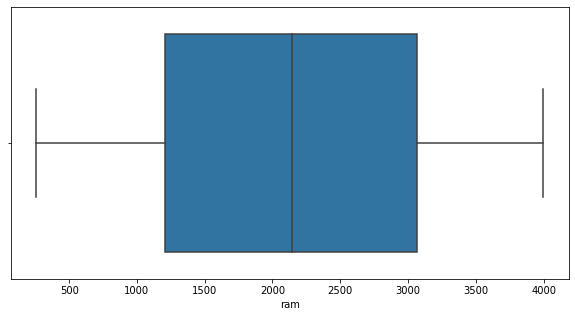

In [ ]:
fig, ax = plt.subplots(figsize =(10,5))
sns.boxplot(numericData['ram'], orient = 'v')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


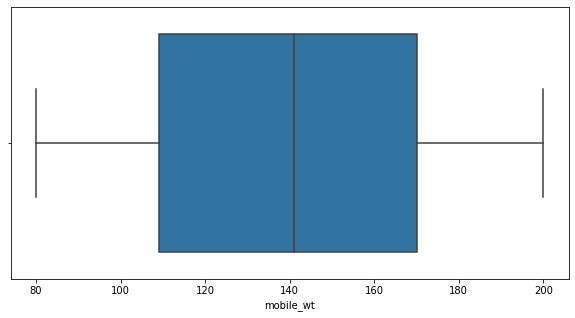

In [ ]:
fig, ax = plt.subplots(figsize =(10,5))
sns.boxplot(numericData['mobile_wt'], orient = 'v')

In [ ]:
scaler=StandardScaler() 
scale_array =scaler.fit_transform(numericData)

In [ ]:
scaleData =pd.DataFrame(scale_array, columns = numericData.columns)
scaleData.head()

,battery_power,clock_speed,fc_megapixel,int_memory,m_depth,mobile_wt,n_cores,pc_megapixel,px_height,px_width,ram,sc_h,sc_w,talk_time
0,-0.902597,0.830779,-0.762495,-1.380644,0.340740,1.349249,-1.101971,-1.305750,-1.408949,-1.146784,0.391703,-0.784983,0.283103,1.462493
1,-0.495139,-1.253064,-0.992890,1.155024,0.687548,-0.120059,-0.664768,-0.645989,0.585778,1.704465,0.467317,1.114266,-0.635317,-0.734267
2,-1.537686,-1.253064,-0.532099,0.493546,1.381165,0.134244,0.209639,-0.645989,1.392684,1.074968,0.441498,-0.310171,-0.864922,-0.368140
3,-1.419319,1.198517,-0.992890,-1.215274,1.034357,-0.261339,0.646842,-0.151168,1.286750,1.236971,0.594569,0.876859,0.512708,-0.002014
4,1.325906,-0.395011,2.002254,0.658915,0.340740,0.021220,-1.101971,0.673534,1.268718,-0.091452,-0.657666,-1.022389,-0.864922,0.730240


In [ ]:
scaleData.describe()

,battery_power,clock_speed,fc_megapixel,int_memory,m_depth,mobile_wt,n_cores,pc_megapixel,px_height,px_width,ram,sc_h,sc_w,talk_time
count,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03
mean,2.128298e-16,-2.172151e-16,9.230117e-17,-8.754109e-17,-1.045830e-16,1.804112e-16,-4.690692e-17,1.669775e-16,1.287304e-16,5.595524e-17,-1.582068e-16,3.719247e-17,-4.085621e-17,1.052491e-16
std,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00
min,-1.678817e+00,-1.253064e+00,-9.928904e-01,-1.656260e+00,-1.393304e+00,-1.702391e+00,-1.539175e+00,-1.635631e+00,-1.454027e+00,-1.739251e+00,-1.722711e+00,-1.734608e+00,-1.324131e+00,-1.649584e+00
25%,-8.804033e-01,-1.007906e+00,-7.624947e-01,-8.845346e-01,-1.046495e+00,-8.829695e-01,-6.647678e-01,-8.109291e-01,-8.167289e-01,-8.719579e-01,-8.453168e-01,-7.849833e-01,-8.649215e-01,-9.173306e-01
50%,-2.849593e-02,-2.727384e-02,-3.017032e-01,-2.563229e-03,-6.069151e-03,2.122020e-02,-2.275644e-01,1.377252e-02,-1.828116e-01,-1.045034e-02,2.055123e-02,-7.276497e-02,-1.761069e-01,-2.013697e-03
75%,8.575560e-01,8.307794e-01,6.198797e-01,8.794082e-01,1.034357e+00,8.406421e-01,1.084046e+00,8.384742e-01,6.810064e-01,8.828792e-01,8.670548e-01,8.768595e-01,7.423125e-01,9.133032e-01
max,1.728812e+00,1.811412e+00,3.384628e+00,1.761380e+00,1.727974e+00,1.688320e+00,1.521249e+00,1.663176e+00,2.963672e+00,1.727608e+00,1.727851e+00,1.589078e+00,2.808756e+00,1.645557e+00


[Text(0, 0, 'battery_power'),
 Text(0, 0, 'clock_speed'),
 Text(0, 0, 'fc_megapixel'),
 Text(0, 0, 'int_memory'),
 Text(0, 0, 'm_depth'),
 Text(0, 0, 'mobile_wt'),
 Text(0, 0, 'n_cores'),
 Text(0, 0, 'pc_megapixel'),
 Text(0, 0, 'px_height'),
 Text(0, 0, 'px_width'),
 Text(0, 0, 'ram'),
 Text(0, 0, 'sc_h'),
 Text(0, 0, 'sc_w'),
 Text(0, 0, 'talk_time')]

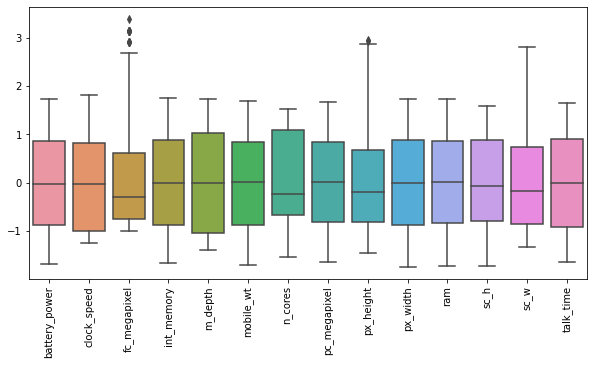

In [ ]:
fig, ax = plt.subplots(figsize =(10,5))
all =sns.boxplot(data = scaleData)
all.set_xticklabels(all.get_xticklabels(), rotation = 90)

In [ ]:
Q1 =numericData.quantile(0.25)
Q3 =numericData.quantile(0.75)
IQR = Q3 - Q1
IQR

battery_power     763.50
clock_speed         1.50
fc_megapixel        6.00
int_memory         32.00
m_depth             0.60
mobile_wt          61.00
n_cores             4.00
pc_megapixel       10.00
px_height         664.50
px_width          758.25
ram              1857.00
sc_h                7.00
sc_w                7.00
talk_time          10.00
dtype: float64

In [ ]:
removeOutlierData = numericData[~((numericData < (Q1 - 1.5 *IQR))|(numericData > (Q3 + 1.5 *IQR))). any(axis=1)]
removeOutlierData.shape

(1980, 14)

[Text(0, 0, 'battery_power'),
 Text(0, 0, 'clock_speed'),
 Text(0, 0, 'fc_megapixel'),
 Text(0, 0, 'int_memory'),
 Text(0, 0, 'm_depth'),
 Text(0, 0, 'mobile_wt'),
 Text(0, 0, 'n_cores'),
 Text(0, 0, 'pc_megapixel'),
 Text(0, 0, 'px_height'),
 Text(0, 0, 'px_width'),
 Text(0, 0, 'ram'),
 Text(0, 0, 'sc_h'),
 Text(0, 0, 'sc_w'),
 Text(0, 0, 'talk_time')]

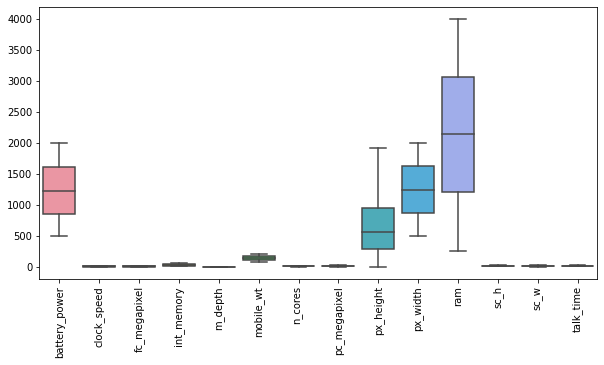

In [ ]:
fig, ax = plt.subplots(figsize =(10,5))
all =sns.boxplot(data = removeOutlierData)
all.set_xticklabels(all.get_xticklabels(), rotation = 90)

In [ ]:
scaleData = scaleData.reset_index()
scaleData.head()

,index,battery_power,clock_speed,fc_megapixel,int_memory,m_depth,mobile_wt,n_cores,pc_megapixel,px_height,px_width,ram,sc_h,sc_w,talk_time
0,0,-0.902597,0.830779,-0.762495,-1.380644,0.340740,1.349249,-1.101971,-1.305750,-1.408949,-1.146784,0.391703,-0.784983,0.283103,1.462493
1,1,-0.495139,-1.253064,-0.992890,1.155024,0.687548,-0.120059,-0.664768,-0.645989,0.585778,1.704465,0.467317,1.114266,-0.635317,-0.734267
2,2,-1.537686,-1.253064,-0.532099,0.493546,1.381165,0.134244,0.209639,-0.645989,1.392684,1.074968,0.441498,-0.310171,-0.864922,-0.368140
3,3,-1.419319,1.198517,-0.992890,-1.215274,1.034357,-0.261339,0.646842,-0.151168,1.286750,1.236971,0.594569,0.876859,0.512708,-0.002014
4,4,1.325906,-0.395011,2.002254,0.658915,0.340740,0.021220,-1.101971,0.673534,1.268718,-0.091452,-0.657666,-1.022389,-0.864922,0.730240


In [ ]:
categoricalData = categoricalData.reset_index()
categoricalData.head()

,index,bluetooth,dual_sim,four_g,three_g,touch_screen,wifi,price_range
0,0,0,0,0,0,0,1,1
1,1,1,1,1,1,1,0,2
2,2,1,1,1,1,1,0,2
3,3,1,0,0,1,0,0,2
4,4,1,0,1,1,1,0,1


In [ ]:
finalDf = pd.concat([scaleData, categoricalData], axis =1)
finalDf.head()

,index,battery_power,clock_speed,fc_megapixel,int_memory,m_depth,mobile_wt,n_cores,pc_megapixel,px_height,px_width,ram,sc_h,sc_w,talk_time,index,bluetooth,dual_sim,four_g,three_g,touch_screen,wifi,price_range
0,0,-0.902597,0.830779,-0.762495,-1.380644,0.340740,1.349249,-1.101971,-1.305750,-1.408949,-1.146784,0.391703,-0.784983,0.283103,1.462493,0,0,0,0,0,0,1,1
1,1,-0.495139,-1.253064,-0.992890,1.155024,0.687548,-0.120059,-0.664768,-0.645989,0.585778,1.704465,0.467317,1.114266,-0.635317,-0.734267,1,1,1,1,1,1,0,2
2,2,-1.537686,-1.253064,-0.532099,0.493546,1.381165,0.134244,0.209639,-0.645989,1.392684,1.074968,0.441498,-0.310171,-0.864922,-0.368140,2,1,1,1,1,1,0,2
3,3,-1.419319,1.198517,-0.992890,-1.215274,1.034357,-0.261339,0.646842,-0.151168,1.286750,1.236971,0.594569,0.876859,0.512708,-0.002014,3,1,0,0,1,0,0,2
4,4,1.325906,-0.395011,2.002254,0.658915,0.340740,0.021220,-1.101971,0.673534,1.268718,-0.091452,-0.657666,-1.022389,-0.864922,0.730240,4,1,0,1,1,1,0,1


In [ ]:
X = finalDf.drop('price_range', axis=1)
Y = finalDf['price_range']

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.20, random_state =101)

In [ ]:
x_train.shape

(1600, 22)

In [ ]:
x_test.shape

(400, 22)

# ***`1-2`***

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


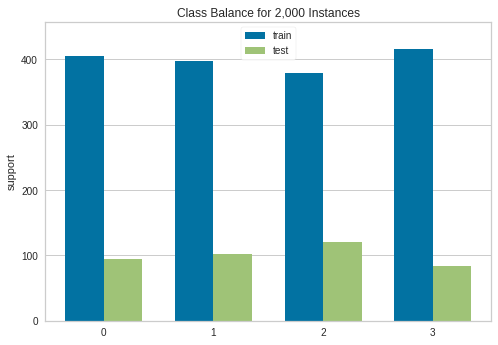

In [ ]:
from yellowbrick.target import ClassBalance
visualizer = ClassBalance(labels=[0, 1, 2,3])
visualizer.fit(y_train, y_test)
visualizer.poof()

In [ ]:
#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(x_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test)

In [ ]:

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[ 92   2   0   0]
 [  4  97   1   0]
 [  0  10 103   7]
 [  0   0   2  82]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97        94
           1       0.89      0.95      0.92       102
           2       0.97      0.86      0.91       120
           3       0.92      0.98      0.95        84

    accuracy                           0.94       400
   macro avg       0.94      0.94      0.94       400
weighted avg       0.94      0.94      0.93       400



In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

print("Precision:",metrics.precision_score(y_test, y_pred,average='macro'))

print("Recall:",metrics.recall_score(y_test, y_pred,average='macro'))

print("F1:",metrics.f1_score(y_test, y_pred,average='macro'))

Accuracy: 0.935
Precision: 0.935322004507089
Recall: 0.9410569014839979
F1: 0.9368334089109775


# ***`1-3`***

In [ ]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='poly', degree=8)
svclassifier.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=8, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
y_pred = svclassifier.predict(x_test)

In [ ]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 16   0   0  78]
 [ 10   0   0  92]
 [  2   4   0 114]
 [  0   0   0  84]]
              precision    recall  f1-score   support

           0       0.57      0.17      0.26        94
           1       0.00      0.00      0.00       102
           2       0.00      0.00      0.00       120
           3       0.23      1.00      0.37        84

    accuracy                           0.25       400
   macro avg       0.20      0.29      0.16       400
weighted avg       0.18      0.25      0.14       400



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred,average='macro'))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred,average='macro'))

print("F1:",metrics.f1_score(y_test, y_pred,average='macro'))

Accuracy: 0.25
Precision: 0.1999223602484472
Recall: 0.2925531914893617
F1: 0.15849412447410416


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
svclassifier = SVC(kernel='rbf')
svclassifier.fit(x_train, y_train)
y_pred = svclassifier.predict(x_test)

In [ ]:
y_pred = svclassifier.predict(x_test)

In [ ]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[52  0  0 42]
 [64  0  0 38]
 [70  0  0 50]
 [47  0  0 37]]
              precision    recall  f1-score   support

           0       0.22      0.55      0.32        94
           1       0.00      0.00      0.00       102
           2       0.00      0.00      0.00       120
           3       0.22      0.44      0.29        84

    accuracy                           0.22       400
   macro avg       0.11      0.25      0.15       400
weighted avg       0.10      0.22      0.14       400



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred,average='macro'))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred,average='macro'))
print("F1:",metrics.f1_score(y_test, y_pred,average='macro'))

Accuracy: 0.2225
Precision: 0.11118321297319525
Recall: 0.24841691995947315
F1: 0.15321588264678293


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
svclassifier = SVC(kernel='sigmoid')
svclassifier.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='sigmoid',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
y_pred = svclassifier.predict(x_test)

In [ ]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[40 51  0  3]
 [55 42  0  5]
 [60 58  0  2]
 [42 41  0  1]]
              precision    recall  f1-score   support

           0       0.20      0.43      0.27        94
           1       0.22      0.41      0.29       102
           2       0.00      0.00      0.00       120
           3       0.09      0.01      0.02        84

    accuracy                           0.21       400
   macro avg       0.13      0.21      0.15       400
weighted avg       0.12      0.21      0.14       400



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred,average='macro'))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred,average='macro'))
print("F1:",metrics.f1_score(y_test, y_pred,average='macro'))

Accuracy: 0.2075
Precision: 0.12817619404706967
Recall: 0.21230034567018297
F1: 0.14542025166007802


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
svclassifier = SVC(kernel='rbf',gamma='auto')
svclassifier.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
y_pred = svclassifier.predict(x_test)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.30      0.32      0.31        94
           1       0.30      0.31      0.31       102
           2       0.43      0.27      0.33       120
           3       0.29      0.42      0.34        84

    accuracy                           0.32       400
   macro avg       0.33      0.33      0.32       400
weighted avg       0.34      0.32      0.32       400



In [ ]:
print(confusion_matrix(y_test, y_pred))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred,average='macro'))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred,average='macro'))
print("F1:",metrics.f1_score(y_test, y_pred,average='macro'))

[[30 26 16 22]
 [27 32 12 31]
 [22 33 32 33]
 [20 15 14 35]]
Accuracy: 0.3225
Precision: 0.3316514315656683
Recall: 0.32905193992490617
F1: 0.32248336463962324


In [ ]:
svclassifier = SVC(kernel='poly', degree=8,gamma='auto')
svclassifier.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=8, gamma='auto', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
y_pred = svclassifier.predict(x_test)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        94
           1       0.00      0.00      0.00       102
           2       0.00      0.00      0.00       120
           3       0.21      1.00      0.35        84

    accuracy                           0.21       400
   macro avg       0.05      0.25      0.09       400
weighted avg       0.04      0.21      0.07       400



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print(confusion_matrix(y_test, y_pred))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred,average='macro'))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred,average='macro'))

print("F1:",metrics.f1_score(y_test, y_pred,average='macro'))

[[  0   0   0  94]
 [  0   0   0 102]
 [  0   0   0 120]
 [  0   0   0  84]]
Accuracy: 0.21
Precision: 0.0525
Recall: 0.25
F1: 0.08677685950413223


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# ***`1-4`***

In [ ]:
from sklearn.svm import SVC
from sklearn import svm
clf = svm.SVC(kernel='linear',C=0.1)

clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)

In [ ]:
print(confusion_matrix(y_test,y_pred))

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred,average='macro'))
print("Recall:",metrics.recall_score(y_test, y_pred,average='macro'))
print("F1:",metrics.f1_score(y_test, y_pred,average='macro'))

[[ 90   4   0   0]
 [  2  98   2   0]
 [  0   8 103   9]
 [  0   0   1  83]]
Accuracy: 0.935
Precision: 0.9357604966813335
Recall: 0.941164923416175
F1: 0.9367391200828107


In [ ]:
clf = svm.SVC(kernel='linear',C=0.01)

clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)

In [ ]:
print(confusion_matrix(y_test,y_pred))

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred,average='macro'))
print("Recall:",metrics.recall_score(y_test, y_pred,average='macro'))
print("F1:",metrics.f1_score(y_test, y_pred,average='macro'))

[[ 89   5   0   0]
 [  2  97   3   0]
 [  0  14 100   6]
 [  0   0   3  81]]
Accuracy: 0.9175
Precision: 0.9221648959368542
Recall: 0.9238519876035521
F1: 0.9210986480769794


In [ ]:
clf = svm.SVC(kernel='linear',C=0.001)

clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)

In [ ]:
print(confusion_matrix(y_test,y_pred))

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred,average='macro'))
print("Recall:",metrics.recall_score(y_test, y_pred,average='macro'))
print("F1:",metrics.f1_score(y_test, y_pred,average='macro'))

[[94  0  0  0]
 [73 26  2  1]
 [14 53  2 51]
 [ 0  0  0 84]]
Accuracy: 0.515
Precision: 0.491524499862187
Recall: 0.5678921568627451
F1: 0.44170590236710355


In [ ]:
clf = svm.SVC(kernel='linear',C=10)

clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)

In [ ]:
print(confusion_matrix(y_test,y_pred))

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred,average='macro'))
print("Recall:",metrics.recall_score(y_test, y_pred,average='macro'))
print("F1:",metrics.f1_score(y_test, y_pred,average='macro'))

[[ 93   1   0   0]
 [  2 100   0   0]
 [  0  15 100   5]
 [  0   0   2  82]]
Accuracy: 0.9375
Precision: 0.9409843066083058
Recall: 0.9448194171285536
F1: 0.9403808512934538


In [ ]:
clf = svm.SVC(kernel='linear',C=50)

clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)

In [ ]:
print(confusion_matrix(y_test,y_pred))

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred,average='macro'))
print("Recall:",metrics.recall_score(y_test, y_pred,average='macro'))
print("F1:",metrics.f1_score(y_test, y_pred,average='macro'))

[[ 91   3   0   0]
 [  1 100   1   0]
 [  0   9 106   5]
 [  0   0   1  83]]
Accuracy: 0.95
Precision: 0.9516627193257629
Recall: 0.9549764586685738
F1: 0.9520037258453816


# ***`1-5 and 1-6`***


## ***Binning***

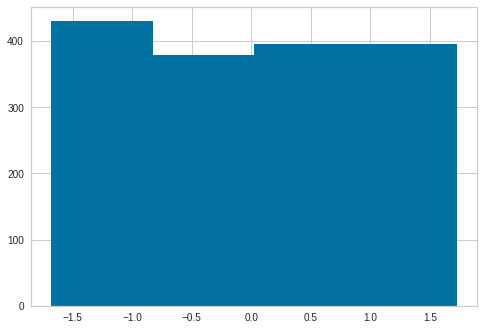

In [ ]:
mpgs = x_train['battery_power']
plt.hist(mpgs, bins=4)
plt.show()

array([-1.67881744, -0.8269101 ,  0.02499725,  0.87690459,  1.72881194])

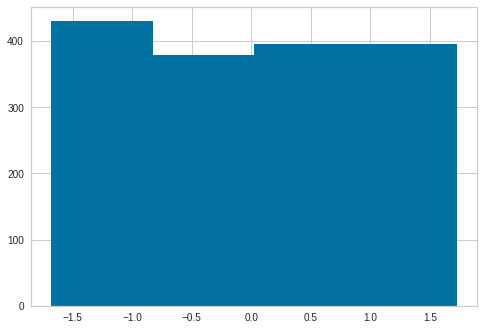

In [ ]:
plt.hist(mpgs, bins=4)[1]

In [ ]:
def make_bins(df):
   label_names = ["low battery", "mid1 battery","mid2 battery","high battery" ]
   cut_points = [-2, -0.8269101, 0.02499725, 0.8769045, 1.72881194]
   df["battery_power_effeciency"] = pd.cut(df["battery_power"], cut_points, labels=label_names)
   return df

In [ ]:
new_x_train_df = make_bins(x_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
new_x_train_df.head()

,index,battery_power,clock_speed,fc_megapixel,int_memory,m_depth,mobile_wt,n_cores,pc_megapixel,px_height,px_width,ram,sc_h,sc_w,talk_time,index,bluetooth,dual_sim,four_g,three_g,touch_screen,wifi,battery_power_effeciency
668,668,0.998118,0.340463,-0.071307,-1.160151,0.687548,-0.459131,0.646842,-0.316108,-0.843213,0.521844,1.518531,0.639453,0.053498,0.181050,668,0,1,0,1,0,0,high battery
1345,1345,-0.663585,-1.253064,-0.762495,1.044778,-1.393304,0.105988,-1.101971,0.838474,-1.019019,-0.843607,0.729198,1.114266,-1.094526,-0.917331,1345,1,0,1,1,1,1,mid1 battery
373,373,-0.390429,0.217884,-0.992890,1.430640,-0.006069,-0.148315,1.084046,-1.635631,-1.275967,-1.320358,-1.307759,-0.072765,0.742313,0.913303,373,1,1,0,0,1,0,mid1 battery
1388,1388,1.560365,-1.253064,-0.301703,1.706256,-0.699686,-0.826458,-1.101971,0.013773,-1.179048,-1.308787,1.197634,0.164641,-0.635317,1.462493,1388,0,0,1,1,0,0,high battery
132,132,-1.351029,-1.253064,-0.762495,0.493546,1.727974,1.603552,1.084046,0.013773,-0.716993,-1.554105,0.772538,-0.072765,0.742313,-1.283457,132,0,0,0,1,1,1,low battery


In [ ]:
dummies = pd.get_dummies(new_x_train_df["battery_power_effeciency"])
new_x_train_df = pd.concat([new_x_train_df, dummies], axis=1)

In [ ]:
new_x_train_df = new_x_train_df.drop('battery_power_effeciency', axis=1)
new_x_train_df = new_x_train_df.drop('battery_power', axis=1)

In [ ]:
new_x_train_df.head()

,index,clock_speed,fc_megapixel,int_memory,m_depth,mobile_wt,n_cores,pc_megapixel,px_height,px_width,ram,sc_h,sc_w,talk_time,index,bluetooth,dual_sim,four_g,three_g,touch_screen,wifi,low battery,mid1 battery,mid2 battery,high battery
668,668,0.340463,-0.071307,-1.160151,0.687548,-0.459131,0.646842,-0.316108,-0.843213,0.521844,1.518531,0.639453,0.053498,0.181050,668,0,1,0,1,0,0,0,0,0,1
1345,1345,-1.253064,-0.762495,1.044778,-1.393304,0.105988,-1.101971,0.838474,-1.019019,-0.843607,0.729198,1.114266,-1.094526,-0.917331,1345,1,0,1,1,1,1,0,1,0,0
373,373,0.217884,-0.992890,1.430640,-0.006069,-0.148315,1.084046,-1.635631,-1.275967,-1.320358,-1.307759,-0.072765,0.742313,0.913303,373,1,1,0,0,1,0,0,1,0,0
1388,1388,-1.253064,-0.301703,1.706256,-0.699686,-0.826458,-1.101971,0.013773,-1.179048,-1.308787,1.197634,0.164641,-0.635317,1.462493,1388,0,0,1,1,0,0,0,0,0,1
132,132,-1.253064,-0.762495,0.493546,1.727974,1.603552,1.084046,0.013773,-0.716993,-1.554105,0.772538,-0.072765,0.742313,-1.283457,132,0,0,0,1,1,1,1,0,0,0


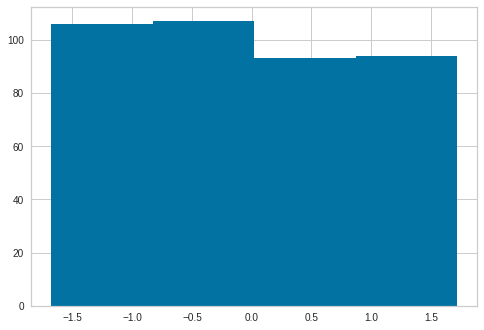

In [ ]:
mpgsT = x_test['battery_power']
plt.hist(mpgsT, bins=4)
plt.show()

array([-1.67654114, -0.82747917,  0.02158279,  0.87064475,  1.71970672])

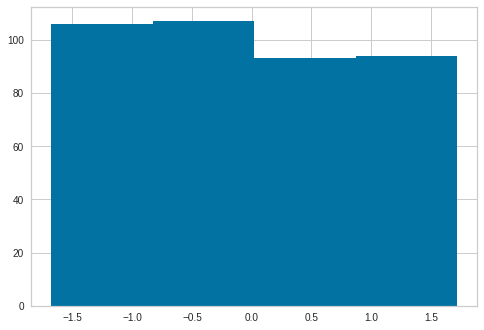

In [ ]:
plt.hist(mpgsT, bins=4)[1]

In [ ]:
def make_binsT(df):
   label_names = ["low battery", "mid1 battery","mid2 battery","high battery" ]
   cut_points = [-2, -0.82747917, 0.02158279, 0.87064475, 1.71970672]
   df["battery_power_effeciency"] = pd.cut(df["battery_power"], cut_points, labels=label_names)
   return df

In [ ]:
new_x_test_df = make_binsT(x_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
new_x_test_df.head()

,index,battery_power,clock_speed,fc_megapixel,int_memory,m_depth,mobile_wt,n_cores,pc_megapixel,px_height,px_width,ram,sc_h,sc_w,talk_time,index,bluetooth,dual_sim,four_g,three_g,touch_screen,wifi,battery_power_effeciency
1458,1458,0.294739,-1.253064,1.311067,0.548669,-1.046495,-1.391576,-1.539175,1.663176,0.590286,-0.755663,-0.492607,-0.072765,-1.324131,0.547176,1458,0,0,1,1,0,0,mid2 battery
198,198,-1.432976,-1.253064,-0.301703,-0.333303,-0.699686,-1.335064,-0.227564,-0.975869,0.660158,1.611892,-0.238103,-0.310171,0.971917,0.547176,198,0,0,0,1,1,1,low battery
1276,1276,-1.485331,-0.149853,1.311067,-1.325520,-0.006069,0.049476,1.521249,0.673534,-1.192571,-1.512447,0.971715,-0.784983,0.283103,-0.185077,1276,0,1,1,1,0,1,low battery
1243,1243,-0.133206,-0.395011,0.159088,0.989655,1.727974,0.105988,-0.227564,1.663176,0.630856,0.001121,-0.608794,-1.259796,-0.635317,1.645557,1243,1,0,1,1,1,1,mid1 battery
1267,1267,-0.779677,-0.640169,-0.301703,-1.546013,-0.699686,-0.826458,-1.539175,-0.975869,1.654140,0.503330,-0.981329,-0.072765,0.971917,-1.283457,1267,0,1,1,1,1,1,mid1 battery


In [ ]:
dummies = pd.get_dummies(new_x_test_df["battery_power_effeciency"])
new_x_test_df = pd.concat([new_x_test_df, dummies], axis=1)

In [ ]:
new_x_test_df = new_x_test_df.drop('battery_power_effeciency', axis=1)
new_x_test_df = new_x_test_df.drop('battery_power', axis=1)

In [ ]:
new_x_test_df.head()

,index,clock_speed,fc_megapixel,int_memory,m_depth,mobile_wt,n_cores,pc_megapixel,px_height,px_width,ram,sc_h,sc_w,talk_time,index,bluetooth,dual_sim,four_g,three_g,touch_screen,wifi,low battery,mid1 battery,mid2 battery,high battery
1458,1458,-1.253064,1.311067,0.548669,-1.046495,-1.391576,-1.539175,1.663176,0.590286,-0.755663,-0.492607,-0.072765,-1.324131,0.547176,1458,0,0,1,1,0,0,0,0,1,0
198,198,-1.253064,-0.301703,-0.333303,-0.699686,-1.335064,-0.227564,-0.975869,0.660158,1.611892,-0.238103,-0.310171,0.971917,0.547176,198,0,0,0,1,1,1,1,0,0,0
1276,1276,-0.149853,1.311067,-1.325520,-0.006069,0.049476,1.521249,0.673534,-1.192571,-1.512447,0.971715,-0.784983,0.283103,-0.185077,1276,0,1,1,1,0,1,1,0,0,0
1243,1243,-0.395011,0.159088,0.989655,1.727974,0.105988,-0.227564,1.663176,0.630856,0.001121,-0.608794,-1.259796,-0.635317,1.645557,1243,1,0,1,1,1,1,0,1,0,0
1267,1267,-0.640169,-0.301703,-1.546013,-0.699686,-0.826458,-1.539175,-0.975869,1.654140,0.503330,-0.981329,-0.072765,0.971917,-1.283457,1267,0,1,1,1,1,1,0,1,0,0


In [ ]:
clf = svm.SVC(kernel='linear')
clf.fit(new_x_train_df, y_train)
y_pred = clf.predict(new_x_test_df)

In [ ]:
print(confusion_matrix(y_test,y_pred))

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

print("Precision:",metrics.precision_score(y_test, y_pred,average='macro'))

print("Recall:",metrics.recall_score(y_test, y_pred,average='macro'))

print("F1:",metrics.f1_score(y_test, y_pred,average='macro'))

[[ 90   4   0   0]
 [  0 100   2   0]
 [  0   6 108   6]
 [  0   0   0  84]]
Accuracy: 0.955
Precision: 0.956060606060606
Recall: 0.9594597413433459
F1: 0.9565761930355577


In [ ]:
def make_bins2(df):
   label_names = ["low battery", "mid1 battery","mid2 battery","high battery" ]
   cut_points = [-2, -1, 0, 0.75, 1.72881194]
   df["battery_power_effeciency"] = pd.cut(df["battery_power"], cut_points, labels=label_names)
   return df

In [ ]:
new_x_train_df = make_bins2(x_train)

In [ ]:
new_x_train_df.head()

,index,clock_speed,fc_megapixel,int_memory,m_depth,mobile_wt,n_cores,pc_megapixel,px_height,px_width,ram,sc_h,sc_w,talk_time,index,bluetooth,dual_sim,four_g,three_g,touch_screen,wifi,low battery,mid1 battery,mid2 battery,high battery
668,668,0.340463,-0.071307,-1.160151,0.687548,-0.459131,0.646842,-0.316108,-0.843213,0.521844,1.518531,0.639453,0.053498,0.181050,668,0,1,0,1,0,0,0,0,0,1
1345,1345,-1.253064,-0.762495,1.044778,-1.393304,0.105988,-1.101971,0.838474,-1.019019,-0.843607,0.729198,1.114266,-1.094526,-0.917331,1345,1,0,1,1,1,1,0,1,0,0
373,373,0.217884,-0.992890,1.430640,-0.006069,-0.148315,1.084046,-1.635631,-1.275967,-1.320358,-1.307759,-0.072765,0.742313,0.913303,373,1,1,0,0,1,0,0,1,0,0
1388,1388,-1.253064,-0.301703,1.706256,-0.699686,-0.826458,-1.101971,0.013773,-1.179048,-1.308787,1.197634,0.164641,-0.635317,1.462493,1388,0,0,1,1,0,0,0,0,0,1
132,132,-1.253064,-0.762495,0.493546,1.727974,1.603552,1.084046,0.013773,-0.716993,-1.554105,0.772538,-0.072765,0.742313,-1.283457,132,0,0,0,1,1,1,1,0,0,0


In [ ]:
dummies = pd.get_dummies(new_x_train_df["battery_power_effeciency"])
new_x_train_df = pd.concat([new_x_train_df, dummies], axis=1)

In [ ]:
new_x_train_df = new_x_train_df.drop('battery_power_effeciency', axis=1)
new_x_train_df = new_x_train_df.drop('battery_power', axis=1)

In [ ]:
new_x_train_df.head()

,index,clock_speed,fc_megapixel,int_memory,m_depth,mobile_wt,n_cores,pc_megapixel,px_height,px_width,ram,sc_h,sc_w,talk_time,index,bluetooth,dual_sim,four_g,three_g,touch_screen,wifi,low battery,mid1 battery,mid2 battery,high battery
668,668,0.340463,-0.071307,-1.160151,0.687548,-0.459131,0.646842,-0.316108,-0.843213,0.521844,1.518531,0.639453,0.053498,0.181050,668,0,1,0,1,0,0,0,0,0,1
1345,1345,-1.253064,-0.762495,1.044778,-1.393304,0.105988,-1.101971,0.838474,-1.019019,-0.843607,0.729198,1.114266,-1.094526,-0.917331,1345,1,0,1,1,1,1,0,1,0,0
373,373,0.217884,-0.992890,1.430640,-0.006069,-0.148315,1.084046,-1.635631,-1.275967,-1.320358,-1.307759,-0.072765,0.742313,0.913303,373,1,1,0,0,1,0,0,1,0,0
1388,1388,-1.253064,-0.301703,1.706256,-0.699686,-0.826458,-1.101971,0.013773,-1.179048,-1.308787,1.197634,0.164641,-0.635317,1.462493,1388,0,0,1,1,0,0,0,0,0,1
132,132,-1.253064,-0.762495,0.493546,1.727974,1.603552,1.084046,0.013773,-0.716993,-1.554105,0.772538,-0.072765,0.742313,-1.283457,132,0,0,0,1,1,1,1,0,0,0


In [ ]:
def make_binsT2(df):
   label_names = ["low battery", "mid1 battery","mid2 battery","high battery" ]
   cut_points = [-2, -1, 0, 0.75, 1.71970672]
   df["battery_power_effeciency"] = pd.cut(df["battery_power"], cut_points, labels=label_names)
   return df

In [ ]:
new_x_test_df = make_binsT2(x_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
new_x_test_df.head()

,index,battery_power,clock_speed,fc_megapixel,int_memory,m_depth,mobile_wt,n_cores,pc_megapixel,px_height,px_width,ram,sc_h,sc_w,talk_time,index,bluetooth,dual_sim,four_g,three_g,touch_screen,wifi,battery_power_effeciency
1458,1458,0.294739,-1.253064,1.311067,0.548669,-1.046495,-1.391576,-1.539175,1.663176,0.590286,-0.755663,-0.492607,-0.072765,-1.324131,0.547176,1458,0,0,1,1,0,0,mid2 battery
198,198,-1.432976,-1.253064,-0.301703,-0.333303,-0.699686,-1.335064,-0.227564,-0.975869,0.660158,1.611892,-0.238103,-0.310171,0.971917,0.547176,198,0,0,0,1,1,1,low battery
1276,1276,-1.485331,-0.149853,1.311067,-1.325520,-0.006069,0.049476,1.521249,0.673534,-1.192571,-1.512447,0.971715,-0.784983,0.283103,-0.185077,1276,0,1,1,1,0,1,low battery
1243,1243,-0.133206,-0.395011,0.159088,0.989655,1.727974,0.105988,-0.227564,1.663176,0.630856,0.001121,-0.608794,-1.259796,-0.635317,1.645557,1243,1,0,1,1,1,1,mid1 battery
1267,1267,-0.779677,-0.640169,-0.301703,-1.546013,-0.699686,-0.826458,-1.539175,-0.975869,1.654140,0.503330,-0.981329,-0.072765,0.971917,-1.283457,1267,0,1,1,1,1,1,mid1 battery


In [ ]:
dummies = pd.get_dummies(new_x_test_df["battery_power_effeciency"])
new_x_test_df = pd.concat([new_x_test_df, dummies], axis=1)

In [ ]:
new_x_test_df = new_x_test_df.drop('battery_power_effeciency', axis=1)
new_x_test_df = new_x_test_df.drop('battery_power', axis=1)

In [ ]:
new_x_test_df.head()

,index,clock_speed,fc_megapixel,int_memory,m_depth,mobile_wt,n_cores,pc_megapixel,px_height,px_width,ram,sc_h,sc_w,talk_time,index,bluetooth,dual_sim,four_g,three_g,touch_screen,wifi,low battery,mid1 battery,mid2 battery,high battery
1458,1458,-1.253064,1.311067,0.548669,-1.046495,-1.391576,-1.539175,1.663176,0.590286,-0.755663,-0.492607,-0.072765,-1.324131,0.547176,1458,0,0,1,1,0,0,0,0,1,0
198,198,-1.253064,-0.301703,-0.333303,-0.699686,-1.335064,-0.227564,-0.975869,0.660158,1.611892,-0.238103,-0.310171,0.971917,0.547176,198,0,0,0,1,1,1,1,0,0,0
1276,1276,-0.149853,1.311067,-1.325520,-0.006069,0.049476,1.521249,0.673534,-1.192571,-1.512447,0.971715,-0.784983,0.283103,-0.185077,1276,0,1,1,1,0,1,1,0,0,0
1243,1243,-0.395011,0.159088,0.989655,1.727974,0.105988,-0.227564,1.663176,0.630856,0.001121,-0.608794,-1.259796,-0.635317,1.645557,1243,1,0,1,1,1,1,0,1,0,0
1267,1267,-0.640169,-0.301703,-1.546013,-0.699686,-0.826458,-1.539175,-0.975869,1.654140,0.503330,-0.981329,-0.072765,0.971917,-1.283457,1267,0,1,1,1,1,1,0,1,0,0


In [ ]:
clf = svm.SVC(kernel='linear')
clf.fit(new_x_train_df, y_train)
y_pred = clf.predict(new_x_test_df)

In [ ]:
print(confusion_matrix(y_test,y_pred))

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

print("Precision:",metrics.precision_score(y_test, y_pred,average='macro'))

print("Recall:",metrics.recall_score(y_test, y_pred,average='macro'))

print("F1:",metrics.f1_score(y_test, y_pred,average='macro'))

[[ 90   4   0   0]
 [  4  97   1   0]
 [  0   9 106   5]
 [  0   0   2  82]]
Accuracy: 0.9375
Precision: 0.9385676975452969
Recall: 0.9419877525478276
F1: 0.9393424169395994


## ***`one hot encoding`***

In [ ]:
categorical = ['bluetooth', 'dual_sim', 'four_g','three_g','touch_screen', 'wifi']
new_x_train = x_train
df = pd.get_dummies(new_x_train, columns = categorical)
dummies = pd.get_dummies(new_x_train, columns = categorical)
new_x_train = pd.concat([new_x_train, dummies], axis=1)


In [ ]:
new_x_train

,index,battery_power,clock_speed,fc_megapixel,int_memory,m_depth,mobile_wt,n_cores,pc_megapixel,px_height,px_width,ram,sc_h,sc_w,talk_time,index,bluetooth,dual_sim,four_g,three_g,touch_screen,wifi,battery_power_effeciency,index,battery_power,clock_speed,fc_megapixel,int_memory,m_depth,mobile_wt,n_cores,pc_megapixel,px_height,px_width,ram,sc_h,sc_w,talk_time,index,battery_power_effeciency,bluetooth_0,bluetooth_1,dual_sim_0,dual_sim_1,four_g_0,four_g_1,three_g_0,three_g_1,touch_screen_0,touch_screen_1,wifi_0,wifi_1
668,668,0.998118,0.340463,-0.071307,-1.160151,0.687548,-0.459131,0.646842,-0.316108,-0.843213,0.521844,1.518531,0.639453,0.053498,0.181050,668,0,1,0,1,0,0,high battery,668,0.998118,0.340463,-0.071307,-1.160151,0.687548,-0.459131,0.646842,-0.316108,-0.843213,0.521844,1.518531,0.639453,0.053498,0.181050,668,high battery,1,0,0,1,1,0,0,1,1,0,1,0
1345,1345,-0.663585,-1.253064,-0.762495,1.044778,-1.393304,0.105988,-1.101971,0.838474,-1.019019,-0.843607,0.729198,1.114266,-1.094526,-0.917331,1345,1,0,1,1,1,1,mid1 battery,1345,-0.663585,-1.253064,-0.762495,1.044778,-1.393304,0.105988,-1.101971,0.838474,-1.019019,-0.843607,0.729198,1.114266,-1.094526,-0.917331,1345,mid1 battery,0,1,1,0,0,1,0,1,0,1,0,1
373,373,-0.390429,0.217884,-0.992890,1.430640,-0.006069,-0.148315,1.084046,-1.635631,-1.275967,-1.320358,-1.307759,-0.072765,0.742313,0.913303,373,1,1,0,0,1,0,mid1 battery,373,-0.390429,0.217884,-0.992890,1.430640,-0.006069,-0.148315,1.084046,-1.635631,-1.275967,-1.320358,-1.307759,-0.072765,0.742313,0.913303,373,mid1 battery,0,1,0,1,1,0,1,0,0,1,1,0
1388,1388,1.560365,-1.253064,-0.301703,1.706256,-0.699686,-0.826458,-1.101971,0.013773,-1.179048,-1.308787,1.197634,0.164641,-0.635317,1.462493,1388,0,0,1,1,0,0,high battery,1388,1.560365,-1.253064,-0.301703,1.706256,-0.699686,-0.826458,-1.101971,0.013773,-1.179048,-1.308787,1.197634,0.164641,-0.635317,1.462493,1388,high battery,1,0,1,0,0,1,0,1,1,0,1,0
132,132,-1.351029,-1.253064,-0.762495,0.493546,1.727974,1.603552,1.084046,0.013773,-0.716993,-1.554105,0.772538,-0.072765,0.742313,-1.283457,132,0,0,0,1,1,1,low battery,132,-1.351029,-1.253064,-0.762495,0.493546,1.727974,1.603552,1.084046,0.013773,-0.716993,-1.554105,0.772538,-0.072765,0.742313,-1.283457,132,low battery,1,0,1,0,1,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1599,1599,-0.165074,-1.253064,0.619880,1.485763,-0.006069,-1.702391,-1.539175,0.178713,-0.469060,-1.419874,1.625496,-1.022389,0.053498,-0.734267,1599,1,0,0,1,0,1,mid1 battery,1599,-0.165074,-1.253064,0.619880,1.485763,-0.006069,-1.702391,-1.539175,0.178713,-0.469060,-1.419874,1.625496,-1.022389,0.053498,-0.734267,1599,mid1 battery,0,1,1,0,1,0,0,1,1,0,0,1
1862,1862,-0.445060,1.443675,-0.301703,-0.167933,-1.046495,-1.617624,1.521249,1.168355,0.545207,-0.829721,-0.867909,-1.734608,-0.635317,-0.551204,1862,0,0,0,1,0,0,mid1 battery,1862,-0.445060,1.443675,-0.301703,-0.167933,-1.046495,-1.617624,1.521249,1.168355,0.545207,-0.829721,-0.867909,-1.734608,-0.635317,-0.551204,1862,mid1 battery,1,0,1,0,1,0,0,1,1,0,1,0
1361,1361,0.706751,-0.027274,-0.992890,-0.278179,-0.352878,-0.769946,0.209639,-0.481048,-0.029544,-0.207168,-1.556730,-0.547577,0.512708,-0.002014,1361,1,1,1,1,0,0,mid2 battery,1361,0.706751,-0.027274,-0.992890,-0.278179,-0.352878,-0.769946,0.209639,-0.481048,-0.029544,-0.207168,-1.556730,-0.547577,0.512708,-0.002014,1361,mid2 battery,0,1,0,1,0,1,0,1,1,0,1,0
1547,1547,0.847882,-1.253064,-0.071307,-0.278179,1.381165,1.660064,-1.539175,0.013773,-1.086637,-0.556631,0.879503,0.639453,-0.864922,-0.917331,1547,0,1,1,1,0,1,high battery,1547,0.847882,-1.253064,-0.071307,-0.278179,1.381165,1.660064,-1.539175,0.013773,-1.086637,-0.556631,0.879503,0.639453,-0.864922,-0.917331,1547,high battery,1,0,0,1,0,1,0,1,1,0,0,1


In [ ]:
new_x_train = new_x_train.drop(columns=categorical, axis=1)

In [ ]:
new_x_test = x_test
df = pd.get_dummies(new_x_test, columns = categorical)
dummies = pd.get_dummies(new_x_test, columns = categorical)
new_x_test = pd.concat([new_x_test, dummies], axis=1)

In [ ]:
new_x_test = new_x_test.drop(columns=categorical, axis=1)

In [ ]:
clf = svm.SVC(kernel='linear')
clf.fit(new_x_train, y_train)
y_pred = clf.predict(new_x_test)

In [ ]:
print(confusion_matrix(y_test,y_pred))

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

print("Precision:",metrics.precision_score(y_test, y_pred,average='macro'))

print("Recall:",metrics.recall_score(y_test, y_pred,average='macro'))

print("F1:",metrics.f1_score(y_test, y_pred,average='macro'))

## ***`transform`***

In [ ]:
x_train.columns

Index(['index', 'battery_power', 'clock_speed', 'fc_megapixel', 'int_memory',
       'm_depth', 'mobile_wt', 'n_cores', 'pc_megapixel', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'index', 'bluetooth',
       'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


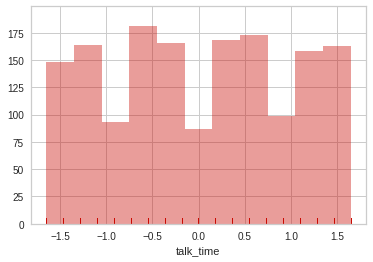

In [ ]:
sns.distplot(x_train["talk_time"], kde=False, rug=True, color = "r");


## ***`new feature`***

In [ ]:
x_train

,index,battery_power,clock_speed,fc_megapixel,int_memory,m_depth,mobile_wt,n_cores,pc_megapixel,px_height,px_width,ram,sc_h,sc_w,talk_time,index,bluetooth,dual_sim,four_g,three_g,touch_screen,wifi
668,668,0.998118,0.340463,-0.071307,-1.160151,0.687548,-0.459131,0.646842,-0.316108,-0.843213,0.521844,1.518531,0.639453,0.053498,0.181050,668,0,1,0,1,0,0
1345,1345,-0.663585,-1.253064,-0.762495,1.044778,-1.393304,0.105988,-1.101971,0.838474,-1.019019,-0.843607,0.729198,1.114266,-1.094526,-0.917331,1345,1,0,1,1,1,1
373,373,-0.390429,0.217884,-0.992890,1.430640,-0.006069,-0.148315,1.084046,-1.635631,-1.275967,-1.320358,-1.307759,-0.072765,0.742313,0.913303,373,1,1,0,0,1,0
1388,1388,1.560365,-1.253064,-0.301703,1.706256,-0.699686,-0.826458,-1.101971,0.013773,-1.179048,-1.308787,1.197634,0.164641,-0.635317,1.462493,1388,0,0,1,1,0,0
132,132,-1.351029,-1.253064,-0.762495,0.493546,1.727974,1.603552,1.084046,0.013773,-0.716993,-1.554105,0.772538,-0.072765,0.742313,-1.283457,132,0,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1599,1599,-0.165074,-1.253064,0.619880,1.485763,-0.006069,-1.702391,-1.539175,0.178713,-0.469060,-1.419874,1.625496,-1.022389,0.053498,-0.734267,1599,1,0,0,1,0,1
1862,1862,-0.445060,1.443675,-0.301703,-0.167933,-1.046495,-1.617624,1.521249,1.168355,0.545207,-0.829721,-0.867909,-1.734608,-0.635317,-0.551204,1862,0,0,0,1,0,0
1361,1361,0.706751,-0.027274,-0.992890,-0.278179,-0.352878,-0.769946,0.209639,-0.481048,-0.029544,-0.207168,-1.556730,-0.547577,0.512708,-0.002014,1361,1,1,1,1,0,0
1547,1547,0.847882,-1.253064,-0.071307,-0.278179,1.381165,1.660064,-1.539175,0.013773,-1.086637,-0.556631,0.879503,0.639453,-0.864922,-0.917331,1547,0,1,1,1,0,1


In [ ]:
x_train["area"] = x_train["sc_h"] * x_train["sc_w"]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
x_train

,index,battery_power,clock_speed,fc_megapixel,int_memory,m_depth,mobile_wt,n_cores,pc_megapixel,px_height,px_width,ram,sc_h,sc_w,talk_time,index,bluetooth,dual_sim,four_g,three_g,touch_screen,wifi,area
668,668,0.998118,0.340463,-0.071307,-1.160151,0.687548,-0.459131,0.646842,-0.316108,-0.843213,0.521844,1.518531,0.639453,0.053498,0.181050,668,0,1,0,1,0,0,0.034209
1345,1345,-0.663585,-1.253064,-0.762495,1.044778,-1.393304,0.105988,-1.101971,0.838474,-1.019019,-0.843607,0.729198,1.114266,-1.094526,-0.917331,1345,1,0,1,1,1,1,-1.219593
373,373,-0.390429,0.217884,-0.992890,1.430640,-0.006069,-0.148315,1.084046,-1.635631,-1.275967,-1.320358,-1.307759,-0.072765,0.742313,0.913303,373,1,1,0,0,1,0,-0.054014
1388,1388,1.560365,-1.253064,-0.301703,1.706256,-0.699686,-0.826458,-1.101971,0.013773,-1.179048,-1.308787,1.197634,0.164641,-0.635317,1.462493,1388,0,0,1,1,0,0,-0.104599
132,132,-1.351029,-1.253064,-0.762495,0.493546,1.727974,1.603552,1.084046,0.013773,-0.716993,-1.554105,0.772538,-0.072765,0.742313,-1.283457,132,0,0,0,1,1,1,-0.054014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1599,1599,-0.165074,-1.253064,0.619880,1.485763,-0.006069,-1.702391,-1.539175,0.178713,-0.469060,-1.419874,1.625496,-1.022389,0.053498,-0.734267,1599,1,0,0,1,0,1,-0.054696
1862,1862,-0.445060,1.443675,-0.301703,-0.167933,-1.046495,-1.617624,1.521249,1.168355,0.545207,-0.829721,-0.867909,-1.734608,-0.635317,-0.551204,1862,0,0,0,1,0,0,1.102025
1361,1361,0.706751,-0.027274,-0.992890,-0.278179,-0.352878,-0.769946,0.209639,-0.481048,-0.029544,-0.207168,-1.556730,-0.547577,0.512708,-0.002014,1361,1,1,1,1,0,0,-0.280747
1547,1547,0.847882,-1.253064,-0.071307,-0.278179,1.381165,1.660064,-1.539175,0.013773,-1.086637,-0.556631,0.879503,0.639453,-0.864922,-0.917331,1547,0,1,1,1,0,1,-0.553077


In [ ]:
x_test["area"] = x_test["sc_h"] * x_test["sc_w"]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
clf = svm.SVC(kernel='linear') 
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

In [ ]:
print(confusion_matrix(y_test,y_pred))

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

print("Precision:",metrics.precision_score(y_test, y_pred,average='macro'))

print("Recall:",metrics.recall_score(y_test, y_pred,average='macro'))

print("F1:",metrics.f1_score(y_test, y_pred,average='macro'))

[[ 91   3   0   0]
 [  2  95   5   0]
 [  0   6 106   8]
 [  0   0   1  83]]
Accuracy: 0.9375
Precision: 0.9376181614084839
Recall: 0.9427215567077896
F1: 0.9394891652981612


## ***`All`***

In [ ]:
new_x_trainA = make_bins(x_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
new_x_trainA

,index,battery_power,clock_speed,fc_megapixel,int_memory,m_depth,mobile_wt,n_cores,pc_megapixel,px_height,px_width,ram,sc_h,sc_w,talk_time,index,bluetooth,dual_sim,four_g,three_g,touch_screen,wifi,battery_power_effeciency
668,668,0.998118,0.340463,-0.071307,-1.160151,0.687548,-0.459131,0.646842,-0.316108,-0.843213,0.521844,1.518531,0.639453,0.053498,0.181050,668,0,1,0,1,0,0,high battery
1345,1345,-0.663585,-1.253064,-0.762495,1.044778,-1.393304,0.105988,-1.101971,0.838474,-1.019019,-0.843607,0.729198,1.114266,-1.094526,-0.917331,1345,1,0,1,1,1,1,mid1 battery
373,373,-0.390429,0.217884,-0.992890,1.430640,-0.006069,-0.148315,1.084046,-1.635631,-1.275967,-1.320358,-1.307759,-0.072765,0.742313,0.913303,373,1,1,0,0,1,0,mid1 battery
1388,1388,1.560365,-1.253064,-0.301703,1.706256,-0.699686,-0.826458,-1.101971,0.013773,-1.179048,-1.308787,1.197634,0.164641,-0.635317,1.462493,1388,0,0,1,1,0,0,high battery
132,132,-1.351029,-1.253064,-0.762495,0.493546,1.727974,1.603552,1.084046,0.013773,-0.716993,-1.554105,0.772538,-0.072765,0.742313,-1.283457,132,0,0,0,1,1,1,low battery
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1599,1599,-0.165074,-1.253064,0.619880,1.485763,-0.006069,-1.702391,-1.539175,0.178713,-0.469060,-1.419874,1.625496,-1.022389,0.053498,-0.734267,1599,1,0,0,1,0,1,mid1 battery
1862,1862,-0.445060,1.443675,-0.301703,-0.167933,-1.046495,-1.617624,1.521249,1.168355,0.545207,-0.829721,-0.867909,-1.734608,-0.635317,-0.551204,1862,0,0,0,1,0,0,mid1 battery
1361,1361,0.706751,-0.027274,-0.992890,-0.278179,-0.352878,-0.769946,0.209639,-0.481048,-0.029544,-0.207168,-1.556730,-0.547577,0.512708,-0.002014,1361,1,1,1,1,0,0,mid2 battery
1547,1547,0.847882,-1.253064,-0.071307,-0.278179,1.381165,1.660064,-1.539175,0.013773,-1.086637,-0.556631,0.879503,0.639453,-0.864922,-0.917331,1547,0,1,1,1,0,1,mid2 battery


In [ ]:
dummies = pd.get_dummies(new_x_trainA["battery_power_effeciency"])
new_x_trainA = pd.concat([new_x_trainA, dummies], axis=1)

In [ ]:
new_x_trainA

,index,battery_power,clock_speed,fc_megapixel,int_memory,m_depth,mobile_wt,n_cores,pc_megapixel,px_height,px_width,ram,sc_h,sc_w,talk_time,index,bluetooth,dual_sim,four_g,three_g,touch_screen,wifi,battery_power_effeciency,low battery,mid1 battery,mid2 battery,high battery
668,668,0.998118,0.340463,-0.071307,-1.160151,0.687548,-0.459131,0.646842,-0.316108,-0.843213,0.521844,1.518531,0.639453,0.053498,0.181050,668,0,1,0,1,0,0,high battery,0,0,0,1
1345,1345,-0.663585,-1.253064,-0.762495,1.044778,-1.393304,0.105988,-1.101971,0.838474,-1.019019,-0.843607,0.729198,1.114266,-1.094526,-0.917331,1345,1,0,1,1,1,1,mid1 battery,0,1,0,0
373,373,-0.390429,0.217884,-0.992890,1.430640,-0.006069,-0.148315,1.084046,-1.635631,-1.275967,-1.320358,-1.307759,-0.072765,0.742313,0.913303,373,1,1,0,0,1,0,mid1 battery,0,1,0,0
1388,1388,1.560365,-1.253064,-0.301703,1.706256,-0.699686,-0.826458,-1.101971,0.013773,-1.179048,-1.308787,1.197634,0.164641,-0.635317,1.462493,1388,0,0,1,1,0,0,high battery,0,0,0,1
132,132,-1.351029,-1.253064,-0.762495,0.493546,1.727974,1.603552,1.084046,0.013773,-0.716993,-1.554105,0.772538,-0.072765,0.742313,-1.283457,132,0,0,0,1,1,1,low battery,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1599,1599,-0.165074,-1.253064,0.619880,1.485763,-0.006069,-1.702391,-1.539175,0.178713,-0.469060,-1.419874,1.625496,-1.022389,0.053498,-0.734267,1599,1,0,0,1,0,1,mid1 battery,0,1,0,0
1862,1862,-0.445060,1.443675,-0.301703,-0.167933,-1.046495,-1.617624,1.521249,1.168355,0.545207,-0.829721,-0.867909,-1.734608,-0.635317,-0.551204,1862,0,0,0,1,0,0,mid1 battery,0,1,0,0
1361,1361,0.706751,-0.027274,-0.992890,-0.278179,-0.352878,-0.769946,0.209639,-0.481048,-0.029544,-0.207168,-1.556730,-0.547577,0.512708,-0.002014,1361,1,1,1,1,0,0,mid2 battery,0,0,1,0
1547,1547,0.847882,-1.253064,-0.071307,-0.278179,1.381165,1.660064,-1.539175,0.013773,-1.086637,-0.556631,0.879503,0.639453,-0.864922,-0.917331,1547,0,1,1,1,0,1,mid2 battery,0,0,1,0


In [ ]:
new_x_trainA = new_x_trainA.drop('battery_power_effeciency', axis=1)
new_x_trainA = new_x_trainA.drop('battery_power', axis=1)

In [ ]:
new_x_testA = make_binsT(x_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
dummies = pd.get_dummies(new_x_testA["battery_power_effeciency"])
new_x_testA = pd.concat([new_x_testA, dummies], axis=1)

In [ ]:
new_x_testA = new_x_testA.drop('battery_power_effeciency', axis=1)
new_x_testA = new_x_testA.drop('battery_power', axis=1)

In [ ]:
categorical = ['bluetooth', 'dual_sim', 'four_g','three_g','touch_screen', 'wifi']
dummies = pd.get_dummies(new_x_trainA, columns = categorical)
new_x_trainA = dummies


In [ ]:
dummies = pd.get_dummies(new_x_testA, columns = categorical)
new_x_testA = dummies

In [ ]:
new_x_trainA["area"] = new_x_trainA["sc_h"] * new_x_trainA["sc_w"]

In [ ]:
new_x_testA["area"] = new_x_testA["sc_h"] * new_x_testA["sc_w"]

In [ ]:
clf = svm.SVC(kernel='linear')
clf.fit(new_x_trainA, y_train)
y_pred = clf.predict(new_x_testA)

In [ ]:
print(confusion_matrix(y_test,y_pred))

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

print("Precision:",metrics.precision_score(y_test, y_pred,average='macro'))

print("Recall:",metrics.recall_score(y_test, y_pred,average='macro'))

print("F1:",metrics.f1_score(y_test, y_pred,average='macro'))

[[ 86   8   0   0]
 [  2  94   6   0]
 [  0   8 105   7]
 [  0   0   0  84]]
Accuracy: 0.9225
Precision: 0.9252102627102627
Recall: 0.9278655611180642
F1: 0.9252345767440107


# ***`1-8`***

In [ ]:
clf_entropy = DecisionTreeClassifier(criterion="entropy",random_state=100,max_depth=3,min_samples_leaf=5)
clf_entropy.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='best')

In [ ]:
y_pred = clf_entropy.predict(x_test)
y_pred

array([1, 1, 3, 1, 0, 1, 2, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 3, 0,
       3, 3, 2, 2, 2, 1, 0, 0, 2, 2, 0, 0, 3, 0, 0, 0, 1, 1, 1, 3, 3, 3,
       3, 1, 2, 3, 3, 1, 0, 1, 2, 2, 3, 2, 0, 3, 3, 3, 2, 2, 3, 1, 2, 1,
       0, 0, 0, 2, 1, 1, 3, 2, 2, 3, 3, 2, 0, 2, 0, 0, 2, 0, 2, 3, 1, 2,
       0, 0, 3, 3, 0, 2, 0, 3, 1, 0, 1, 3, 1, 2, 2, 3, 0, 2, 0, 0, 2, 0,
       1, 0, 3, 2, 2, 2, 1, 3, 1, 0, 3, 3, 2, 3, 1, 2, 3, 2, 1, 1, 0, 0,
       1, 1, 0, 2, 3, 0, 2, 2, 2, 3, 0, 1, 0, 0, 1, 3, 2, 0, 3, 1, 3, 2,
       3, 2, 2, 0, 3, 1, 1, 2, 2, 2, 1, 2, 1, 1, 2, 3, 1, 2, 1, 3, 2, 3,
       1, 1, 3, 2, 1, 1, 0, 0, 3, 2, 1, 2, 1, 2, 1, 0, 2, 3, 0, 2, 0, 1,
       3, 0, 1, 2, 3, 2, 1, 3, 0, 3, 2, 3, 2, 1, 1, 3, 0, 3, 0, 0, 3, 1,
       1, 2, 3, 0, 1, 3, 2, 1, 3, 1, 1, 2, 1, 2, 0, 3, 1, 1, 2, 0, 1, 1,
       2, 3, 0, 3, 3, 2, 3, 3, 1, 2, 1, 2, 2, 2, 0, 2, 0, 0, 1, 3, 3, 0,
       1, 0, 1, 1, 0, 2, 3, 1, 3, 1, 1, 2, 1, 2, 1, 2, 1, 3, 1, 2, 2, 3,
       3, 1, 3, 3, 2, 3, 0, 1, 1, 0, 2, 1, 0, 1, 3,

In [ ]:
print("Accuracy:",accuracy_score(y_test, y_pred)*100)

Accuracy: 74.0


[Text(167.4, 190.26, 'X[11] <= 0.103\nentropy = 1.999\nsamples = 1600\nvalue = [406, 398, 380, 416]'),
 Text(83.7, 135.9, 'X[11] <= -0.867\nentropy = 1.363\nsamples = 838\nvalue = [406, 349, 83, 0]'),
 Text(41.85, 81.53999999999999, 'X[9] <= 1.812\nentropy = 0.562\nsamples = 395\nvalue = [343, 52, 0, 0]'),
 Text(20.925, 27.180000000000007, 'entropy = 0.447\nsamples = 375\nvalue = [340, 35, 0, 0]'),
 Text(62.775000000000006, 27.180000000000007, 'entropy = 0.61\nsamples = 20\nvalue = [3, 17, 0, 0]'),
 Text(125.55000000000001, 81.53999999999999, 'X[1] <= 0.38\nentropy = 1.24\nsamples = 443\nvalue = [63, 297, 83, 0]'),
 Text(104.625, 27.180000000000007, 'entropy = 1.108\nsamples = 271\nvalue = [63, 190, 18, 0]'),
 Text(146.475, 27.180000000000007, 'entropy = 0.957\nsamples = 172\nvalue = [0, 107, 65, 0]'),
 Text(251.10000000000002, 135.9, 'X[11] <= 0.82\nentropy = 1.261\nsamples = 762\nvalue = [0, 49, 297, 416]'),
 Text(209.25, 81.53999999999999, 'X[1] <= 0.287\nentropy = 1.203\nsamples = 

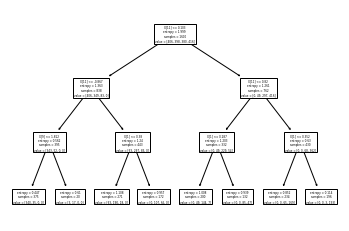

In [ ]:
tree.plot_tree(clf_entropy) 

# ***`1-9`***

In [ ]:
clf_entropy = DecisionTreeClassifier(criterion="entropy",random_state=100,max_depth=6,min_samples_leaf=5)
clf_entropy.fit(x_train,y_train)
y_pred = clf_entropy.predict(x_test)

In [ ]:
print("Accuracy:",accuracy_score(y_test, y_pred)*100)

Accuracy: 84.5


In [ ]:
clf_entropy = DecisionTreeClassifier(criterion="entropy",random_state=100,max_depth=9,min_samples_leaf=5)
clf_entropy.fit(x_train,y_train)
y_pred = clf_entropy.predict(x_test)

In [ ]:
print("Accuracy:",accuracy_score(y_test, y_pred)*100)

Accuracy: 87.0


In [ ]:
clf_entropy = DecisionTreeClassifier(criterion="entropy",random_state=100,max_depth=3,min_samples_leaf=21)
clf_entropy.fit(x_train,y_train)
y_pred = clf_entropy.predict(x_test)

In [ ]:
print("Accuracy:",accuracy_score(y_test, y_pred)*100)

Accuracy: 73.5


# ***`1-11`***

In [ ]:
clf = tree.DecisionTreeClassifier(random_state=0)
clf.fit(x_train,y_train)
y_train_pred = clf.predict(x_train)
y_test_pred = clf.predict(x_test)

In [ ]:
print(f'Train score {accuracy_score(y_train_pred,y_train)}')
print(f'Test score {accuracy_score(y_test_pred,y_test)}')

Train score 1.0
Test score 0.8275


In [ ]:
params = {'max_depth': [2,4,6,8,10,12],
         'min_samples_split': [2,3,4],
         'min_samples_leaf': [1,2]}

clf = tree.DecisionTreeClassifier()
gcv = GridSearchCV(estimator=clf,param_grid=params)
gcv.fit(x_train,y_train)
model = gcv.best_estimator_
model.fit(x_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [2, 4, 6, 8, 10, 12],
               

In [ ]:
model = gcv.best_estimator_
model.fit(x_train,y_train)
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

print(f'Train score {accuracy_score(y_train_pred,y_train)}')
print(f'Test score {accuracy_score(y_test_pred,y_test)}')

Train score 0.926875
Test score 0.8275


# ***`1-16`***

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/MyDrive/kaggle"

In [ ]:
#changing the working directory
%cd /content/gdrive/MyDrive/kaggle
#Check the present working directory using pwd command

/content/gdrive/MyDrive/kaggle


In [ ]:
!ls

'Bitcoin Historical Data - Investing.com.csv'
 datasets_preparing.py
 Desktop.zip
 img.txt
'kaggle (1).json'
'kaggle (2).json'
 kaggle.json
'TestBitcoin Historical Data - Investing.com.csv'
 trainImg
 trainWeighte2-1.txt
 trainWeighte.txt


In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/kaggle/Bitcoin Historical Data - Investing.com.csv',encoding = 'utf8')
df.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,"Jan 01, 2020","7,199.8","7,196.4","7,259.4","7,180.0",420.28K,0.05%
1,"Dec 31, 2019","7,196.4","7,261.5","7,331.0","7,167.4",586.60K,-0.90%
2,"Dec 30, 2019","7,261.8","7,397.5","7,420.9","7,244.1",606.11K,-1.84%
3,"Dec 29, 2019","7,397.5","7,321.6","7,518.9","7,303.0",611.69K,1.04%
4,"Dec 28, 2019","7,321.5","7,261.9","7,375.9","7,256.5",610.96K,0.82%


In [ ]:
dfT = pd.read_csv('/content/gdrive/MyDrive/kaggle/TestBitcoin Historical Data - Investing.com.csv',encoding = 'utf8')
dfT.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,"May 01, 2021","57,807.1","57,719.1","58,449.4","57,029.5",63.41K,0.15%
1,"Apr 30, 2021","57,720.3","53,562.3","57,925.6","53,088.7",103.74K,7.77%
2,"Apr 29, 2021","53,560.8","54,838.6","55,173.7","52,400.0",83.90K,-2.34%
3,"Apr 28, 2021","54,841.4","55,036.0","56,419.9","53,876.4",86.96K,-0.35%
4,"Apr 27, 2021","55,036.5","54,011.1","55,427.8","53,345.0",84.08K,1.88%


In [ ]:
def mdy_to_ymd(d):
    return datetime.strptime(d, '%b %d, %Y').strftime('%Y-%m-%d')

In [ ]:
df['newDate'] = df['Date'].apply(mdy_to_ymd)
dfT['newDate'] = dfT['Date'].apply(mdy_to_ymd)

df = df.drop('Date',axis=1)
dfT = dfT.drop('Date',axis=1)

# ***`1-17`***

In [ ]:
df.head()

,Price,Open,High,Low,Vol.,Change %,newDate
0,"7,199.8","7,196.4","7,259.4","7,180.0",420.28K,0.05%,2020-01-01
1,"7,196.4","7,261.5","7,331.0","7,167.4",586.60K,-0.90%,2019-12-31
2,"7,261.8","7,397.5","7,420.9","7,244.1",606.11K,-1.84%,2019-12-30
3,"7,397.5","7,321.6","7,518.9","7,303.0",611.69K,1.04%,2019-12-29
4,"7,321.5","7,261.9","7,375.9","7,256.5",610.96K,0.82%,2019-12-28


In [ ]:
df = df[::-1].reset_index(drop = True)
print(df)    

        Price     Open     High      Low     Vol. Change %     newDate
0         0.1      0.0      0.1      0.1    0.08K    0.00%  2010-07-18
1         0.1      0.1      0.1      0.1    0.57K    0.00%  2010-07-19
2         0.1      0.1      0.1      0.1    0.26K    0.00%  2010-07-20
3         0.1      0.1      0.1      0.1    0.58K    0.00%  2010-07-21
4         0.1      0.1      0.1      0.1    2.16K    0.00%  2010-07-22
...       ...      ...      ...      ...      ...      ...         ...
3450  7,321.5  7,261.9  7,375.9  7,256.5  610.96K    0.82%  2019-12-28
3451  7,397.5  7,321.6  7,518.9  7,303.0  611.69K    1.04%  2019-12-29
3452  7,261.8  7,397.5  7,420.9  7,244.1  606.11K   -1.84%  2019-12-30
3453  7,196.4  7,261.5  7,331.0  7,167.4  586.60K   -0.90%  2019-12-31
3454  7,199.8  7,196.4  7,259.4  7,180.0  420.28K    0.05%  2020-01-01

[3455 rows x 7 columns]


In [ ]:
dfT = dfT[::-1].reset_index(drop = True)
print(dfT)  

        Price      Open      High       Low     Vol. Change %     newDate
0     6,967.0   7,199.7   7,209.6   6,901.4  632.78K   -3.23%  2020-01-02
1     7,343.1   6,967.1   7,402.9   6,884.1  936.29K    5.40%  2020-01-03
2     7,376.8   7,345.1   7,433.1   7,291.4  523.91K    0.46%  2020-01-04
3     7,372.5   7,376.8   7,501.0   7,345.6  628.14K   -0.06%  2020-01-05
4     7,759.1   7,372.6   7,783.1   7,366.7  786.75K    5.24%  2020-01-06
..        ...       ...       ...       ...      ...      ...         ...
481  55,036.5  54,011.1  55,427.8  53,345.0   84.08K    1.88%  2021-04-27
482  54,841.4  55,036.0  56,419.9  53,876.4   86.96K   -0.35%  2021-04-28
483  53,560.8  54,838.6  55,173.7  52,400.0   83.90K   -2.34%  2021-04-29
484  57,720.3  53,562.3  57,925.6  53,088.7  103.74K    7.77%  2021-04-30
485  57,807.1  57,719.1  58,449.4  57,029.5   63.41K    0.15%  2021-05-01

[486 rows x 7 columns]


In [ ]:
df.replace(',','', regex=True, inplace=True)
df.replace('%','', regex=True, inplace=True)

In [ ]:
df

,Price,Open,High,Low,Vol.,Change %,newDate
0,0.1,0.0,0.1,0.1,0.08K,0.00,2010-07-18
1,0.1,0.1,0.1,0.1,0.57K,0.00,2010-07-19
2,0.1,0.1,0.1,0.1,0.26K,0.00,2010-07-20
3,0.1,0.1,0.1,0.1,0.58K,0.00,2010-07-21
4,0.1,0.1,0.1,0.1,2.16K,0.00,2010-07-22
...,...,...,...,...,...,...,...
3450,7321.5,7261.9,7375.9,7256.5,610.96K,0.82,2019-12-28
3451,7397.5,7321.6,7518.9,7303.0,611.69K,1.04,2019-12-29
3452,7261.8,7397.5,7420.9,7244.1,606.11K,-1.84,2019-12-30
3453,7196.4,7261.5,7331.0,7167.4,586.60K,-0.90,2019-12-31


In [ ]:
df = df.rename(columns = {
    'Vol.': 'Vol',
    'Change %': 'Change',
})

In [ ]:
df["Price"] = df.Price.astype(float)
df["Open"] = df.Open.astype(float)
df["High"] = df.High.astype(float)
df["Low"] = df.Low.astype(float)
df['Change'] = df.Change.astype(float)

In [ ]:
def value_to_float(x):
    if type(x) == float or type(x) == int:
        return x
    if 'K' in x:
        if len(x) > 1:
            return float(x.replace('K', '')) * 1000
        return 1000.0
    if 'M' in x:
        if len(x) > 1:
            return float(x.replace('M', '')) * 1000000
        return 1000000.0
    if 'B' in x:
        return float(x.replace('B', '')) * 1000000000
    return 0.0

In [ ]:
df['Vol'] = df['Vol'].apply(value_to_float)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3455 entries, 0 to 3454
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Price    3455 non-null   float64
 1   Open     3455 non-null   float64
 2   High     3455 non-null   float64
 3   Low      3455 non-null   float64
 4   Vol      3455 non-null   float64
 5   Change   3455 non-null   float64
 6   newDate  3455 non-null   object 
dtypes: float64(6), object(1)
memory usage: 189.1+ KB


In [ ]:
dfT.replace(',','', regex=True, inplace=True)
dfT.replace('%','', regex=True, inplace=True)

In [ ]:
dfT = dfT.rename(columns = {
    'Vol.': 'Vol',
    'Change %': 'Change',
})

In [ ]:
dfT["Price"] = dfT.Price.astype(float)
dfT["Open"] = dfT.Open.astype(float)
dfT["High"] = dfT.High.astype(float)
dfT["Low"] = dfT.Low.astype(float)
dfT['Change'] = dfT.Change.astype(float)

In [ ]:
dfT['Vol'] = dfT['Vol'].apply(value_to_float)

In [ ]:
dfT.head()

,Price,Open,High,Low,Vol,Change,newDate
0,6967.0,7199.7,7209.6,6901.4,632780.0,-3.23,2020-01-02
1,7343.1,6967.1,7402.9,6884.1,936290.0,5.40,2020-01-03
2,7376.8,7345.1,7433.1,7291.4,523910.0,0.46,2020-01-04
3,7372.5,7376.8,7501.0,7345.6,628140.0,-0.06,2020-01-05
4,7759.1,7372.6,7783.1,7366.7,786750.0,5.24,2020-01-06


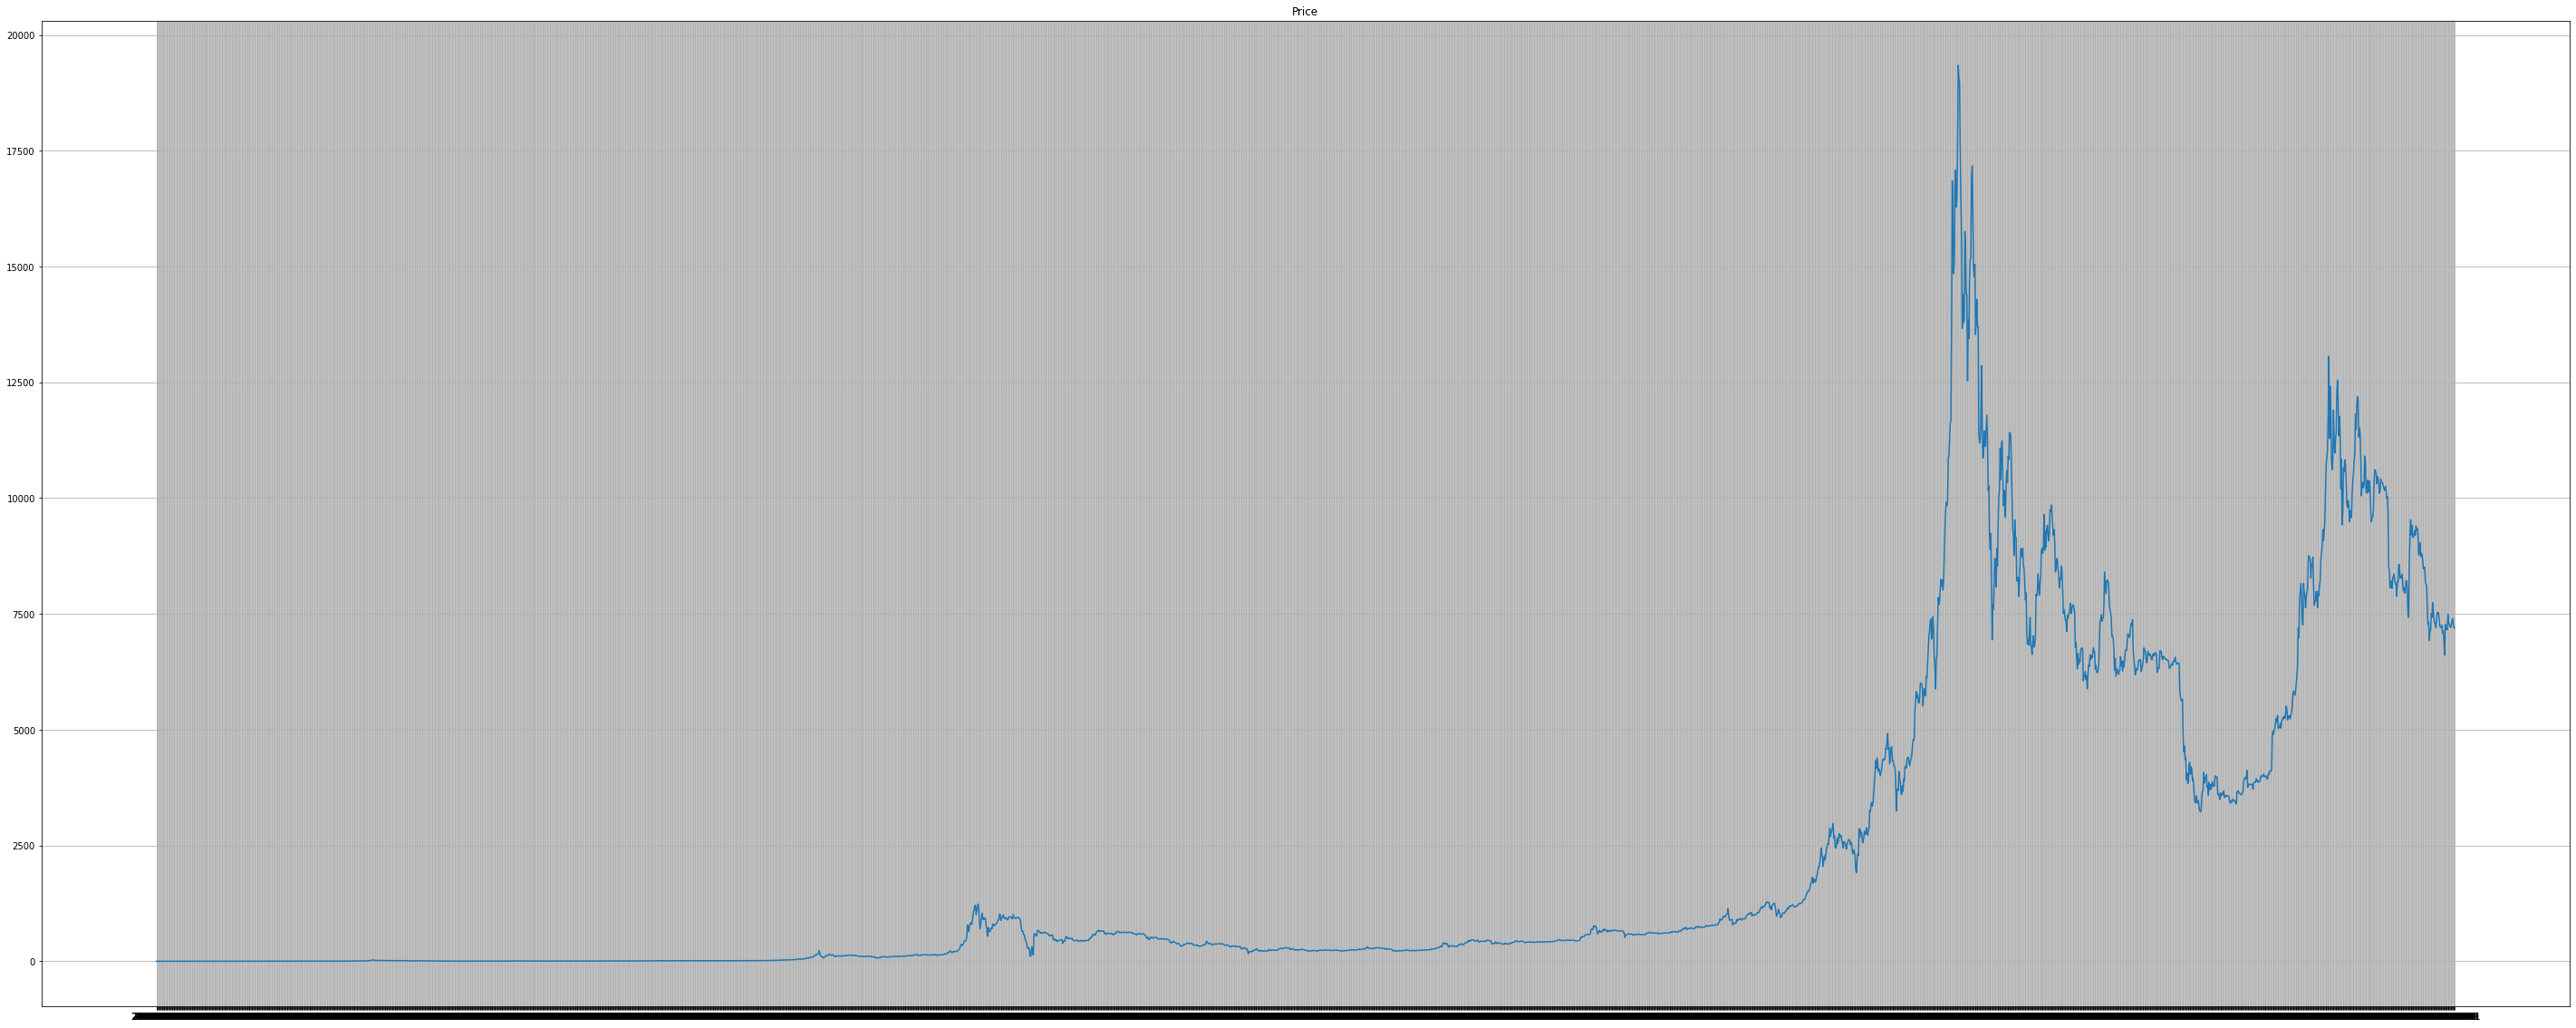

In [ ]:
plt.figure(figsize=(50, 20))
plt.plot(df['newDate'],df['Price'])
plt.title('Price')
plt.grid(True)
plt.show()

In [ ]:
finalDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3455 entries, 0 to 3454
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Price    3455 non-null   float64
 1   Open     3455 non-null   float64
 2   High     3455 non-null   float64
 3   Low      3455 non-null   float64
 4   Vol      3455 non-null   float64
 5   Change   3455 non-null   float64
 6   newDate  3455 non-null   float64
dtypes: float64(7)
memory usage: 189.1 KB


In [ ]:
finalDf.isnull().sum()

Price      0
Open       0
High       0
Low        0
Vol        0
Change     0
newDate    0
dtype: int64

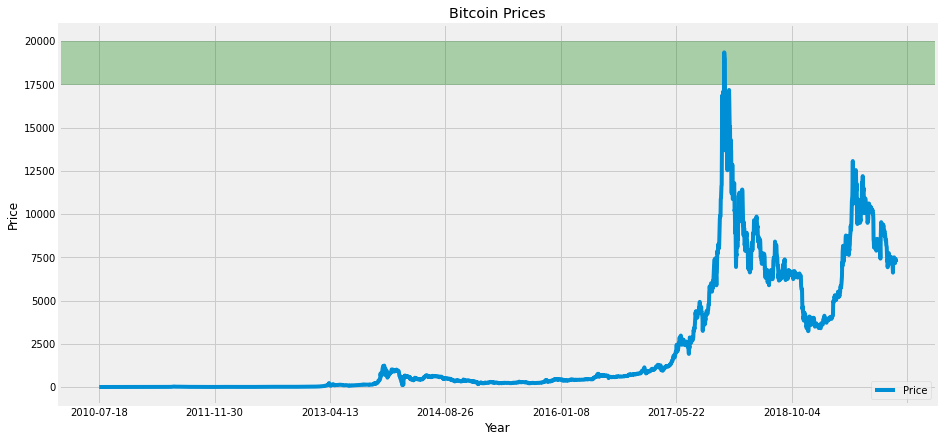

In [ ]:
ax = df.plot(x='newDate',y='Price',title='Bitcoin Prices', grid=True, figsize=(14,7))
ax.set_xlabel('Year')
ax.set_ylabel('Price')

ax.axhspan(17500,20000, color='green',alpha=0.3)

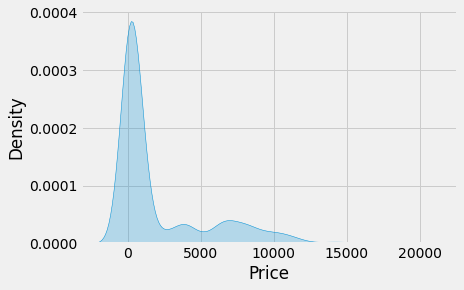

In [ ]:
sns.kdeplot(df['Price'], shade=True)

No handles with labels found to put in legend.


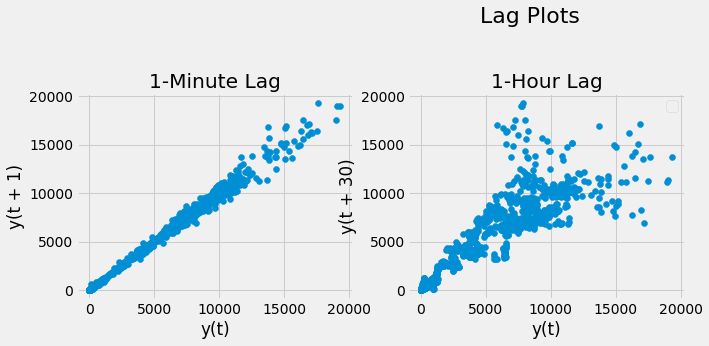

In [ ]:
plt.figure(figsize=(15,12))
plt.suptitle('Lag Plots', fontsize=22)

plt.subplot(3,3,1)
pd.plotting.lag_plot(df['Price'], lag=1) #minute lag
plt.title('1-Minute Lag')

plt.subplot(3,3,2)
pd.plotting.lag_plot(df['Price'], lag=30) #month lag
plt.title('1-Hour Lag')

plt.legend()
plt.show()

In [ ]:
import plotly.express as px

#bitstamp_daily.reset_index(inplace=True)
fig = px.line(df, x='newDate', y='Price', title='Weighted Price with Range Slider and Selectors')
fig.update_layout(hovermode="x")

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(count=2, label="2y", step="year", stepmode="backward"),
            dict(step="all")
            
        ])
    )
)
fig.show()

## ***`ARIMA`***

In [ ]:
!pip install pmdarima

In [ ]:
import pmdarima as pm

In [ ]:
df

,Price,Open,High,Low,Vol,Change,newDate
0,0.1,0.0,0.1,0.1,80.0,0.00,2010-07-18
1,0.1,0.1,0.1,0.1,570.0,0.00,2010-07-19
2,0.1,0.1,0.1,0.1,260.0,0.00,2010-07-20
3,0.1,0.1,0.1,0.1,580.0,0.00,2010-07-21
4,0.1,0.1,0.1,0.1,2160.0,0.00,2010-07-22
...,...,...,...,...,...,...,...
3450,7321.5,7261.9,7375.9,7256.5,610960.0,0.82,2019-12-28
3451,7397.5,7321.6,7518.9,7303.0,611690.0,1.04,2019-12-29
3452,7261.8,7397.5,7420.9,7244.1,606110.0,-1.84,2019-12-30
3453,7196.4,7261.5,7331.0,7167.4,586600.0,-0.90,2019-12-31


In [ ]:
exogenous_features = ['Open','High','Low','Vol','Change']


In [ ]:
model = pm.auto_arima(df.Price, exogenous=df[exogenous_features], trace=True, error_action="ignore", suppress_warnings=True)
model.fit(df.Price, exogenous=df[exogenous_features])
forecast = model.predict(n_periods=len(dfT), exogenous=dfT[exogenous_features])
dfT["Forecast_ARIMAX"] = forecast

Performing stepwise search to minimize aic


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:1890: RuntimeWarning:

divide by zero encountered in reciprocal

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:1897: RuntimeWarning:

divide by zero encountered in reciprocal



 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=39927.261, Time=5.24 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=39917.807, Time=2.14 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=39889.988, Time=2.41 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=39891.571, Time=3.09 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=64612.124, Time=1.58 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=39890.091, Time=3.85 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=39888.195, Time=3.89 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=39888.317, Time=4.22 sec


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:1890: RuntimeWarning:

divide by zero encountered in reciprocal

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:1897: RuntimeWarning:

divide by zero encountered in reciprocal



 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=39925.173, Time=4.44 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=39891.573, Time=4.17 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=39886.657, Time=8.00 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=39890.095, Time=3.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=39888.514, Time=2.12 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=39886.912, Time=8.70 sec


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:1890: RuntimeWarning:

divide by zero encountered in reciprocal

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:1897: RuntimeWarning:

divide by zero encountered in reciprocal



 ARIMA(1,0,2)(0,0,0)[0]             : AIC=39923.582, Time=3.88 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=39890.070, Time=8.58 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=39888.590, Time=5.40 sec


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:1890: RuntimeWarning:

divide by zero encountered in reciprocal

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:1897: RuntimeWarning:

divide by zero encountered in reciprocal



 ARIMA(2,0,2)(0,0,0)[0]             : AIC=39925.675, Time=4.30 sec

Best model:  ARIMA(1,0,1)(0,0,0)[0]          
Total fit time: 79.085 seconds


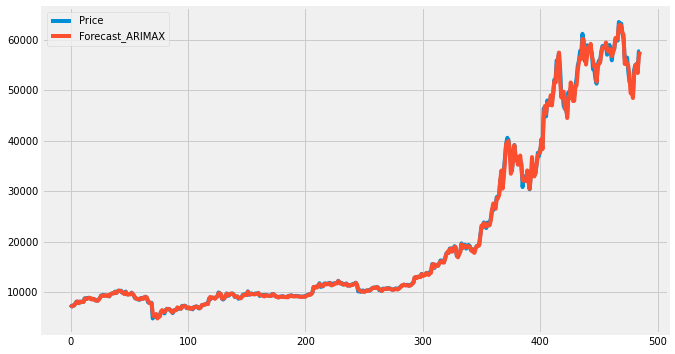

In [ ]:
dfT[["Price", "Forecast_ARIMAX"]].plot(figsize=(10, 6))

In [ ]:
print("RMSE of Auto ARIMAX:", np.sqrt(mean_squared_error(dfT.Price, dfT.Forecast_ARIMAX)))

print("\nMAE of Auto ARIMAX:", mean_absolute_error(dfT.Price, dfT.Forecast_ARIMAX))

RMSE of Auto ARIMAX: 487.49448654455387

MAE of Auto ARIMAX: 255.2042191030597


In [ ]:
temp = pd.DataFrame({'test':dfT.Price,'pred':dfT.Forecast_ARIMAX})
temp.head()

,test,pred
0,6967.0,6997.142805
1,7343.1,7263.072120
2,7376.8,7354.454961
3,7372.5,7429.685824
4,7759.1,7689.529289


In [ ]:
temp['upper_range'] = temp['test'] * 1.05
temp['lower_range'] = temp['test'] * 0.95

temp[(temp['upper_range'] >=temp['pred']) & (temp['pred'] >= temp['lower_range'])].shape[0] * 100/temp.shape[0]

97.94238683127573

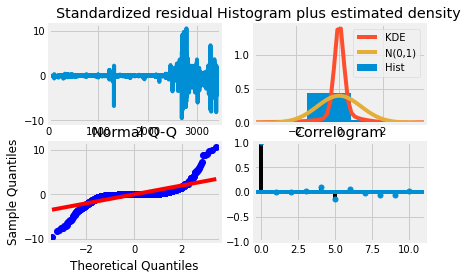

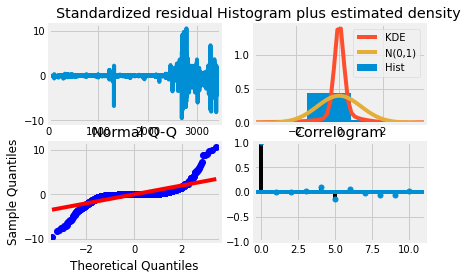

In [ ]:
model.plot_diagnostics()

## ***`LGBMRegressor`***

In [ ]:
X_train, y_train = df[exogenous_features], df.Price
X_test, y_test = dfT[exogenous_features], dfT.Price

In [ ]:
lightgbm = LGBMRegressor(objective='regression', 
                       num_leaves=6,
                       learning_rate=0.01, 
                       n_estimators=7000,
                       max_bin=200, 
                       bagging_fraction=0.8,
                       bagging_freq=4, 
                       bagging_seed=8,
                       feature_fraction=0.2,
                       feature_fraction_seed=8,
                       min_sum_hessian_in_leaf = 11,
                       verbose=-1,
                       random_state=42)

In [ ]:
lightgbm.fit(X_train, y_train)

LGBMRegressor(bagging_fraction=0.8, bagging_freq=4, bagging_seed=8,
              boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              feature_fraction=0.2, feature_fraction_seed=8,
              importance_type='split', learning_rate=0.01, max_bin=200,
              max_depth=-1, min_child_samples=20, min_child_weight=0.001,
              min_split_gain=0.0, min_sum_hessian_in_leaf=11, n_estimators=7000,
              n_jobs=-1, num_leaves=6, objective='regression', random_state=42,
              reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=1.0,
              subsample_for_bin=200000, subsample_freq=0, verbose=-1)

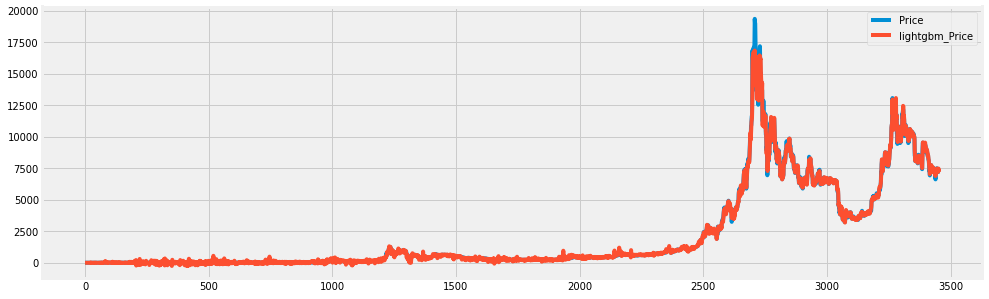

In [ ]:
df['lightgbm_Price'] = lightgbm.predict(X_train)

df[['Price','lightgbm_Price']].plot(figsize=(15, 5))

In [ ]:
dfT['Forecast_lightgbm'] = lightgbm.predict(X_test)


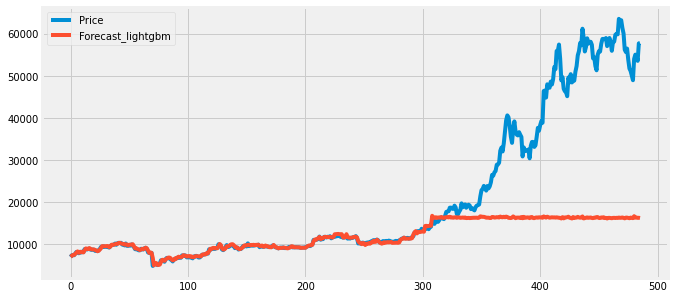

In [ ]:
dfT[['Price','Forecast_lightgbm']].plot(figsize=(10, 5))

In [ ]:
test_mae = mean_absolute_error(dfT['Price'], dfT['Forecast_lightgbm'])
test_rmse = np.sqrt(mean_squared_error(dfT['Price'], dfT['Forecast_lightgbm']))
test_r2 = r2_score(dfT['Price'], dfT['Forecast_lightgbm'])

print(f"test MAE : {test_mae}")
print(f"test RMSE : {test_rmse}")
print(f"test R2 : {test_r2}")

test MAE : 8505.200412552247
test RMSE : 16787.063764372262
test R2 : 0.04929655467421046


In [ ]:
temp = pd.DataFrame({'test':dfT.Price,'pred':dfT.Forecast_lightgbm})
temp.head()

,test,pred
0,6967.0,7003.982404
1,7343.1,7227.182447
2,7376.8,7438.562425
3,7372.5,7438.767767
4,7759.1,7694.583638


In [ ]:
temp['upper_range'] = temp['test'] * 1.05
temp['lower_range'] = temp['test'] * 0.95

temp[(temp['upper_range'] >=temp['pred']) & (temp['pred'] >= temp['lower_range'])].shape[0] * 100/temp.shape[0]

62.34567901234568

## ***`Gradient Boosting Regressor`***

In [ ]:
X_train, y_train = df[exogenous_features], df.Price
X_test, y_test = dfT[exogenous_features], dfT.Price

In [ ]:
gbr = GradientBoostingRegressor(n_estimators=6000,learning_rate=0.01,
                                max_depth=4,max_features='sqrt',
                                min_samples_leaf=15,
                                min_samples_split=10,
                                loss='huber',random_state=42)  

In [ ]:
gbr.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.01, loss='huber',
                          max_depth=4, max_features='sqrt', max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=15, min_samples_split=10,
                          min_weight_fraction_leaf=0.0, n_estimators=6000,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=42, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

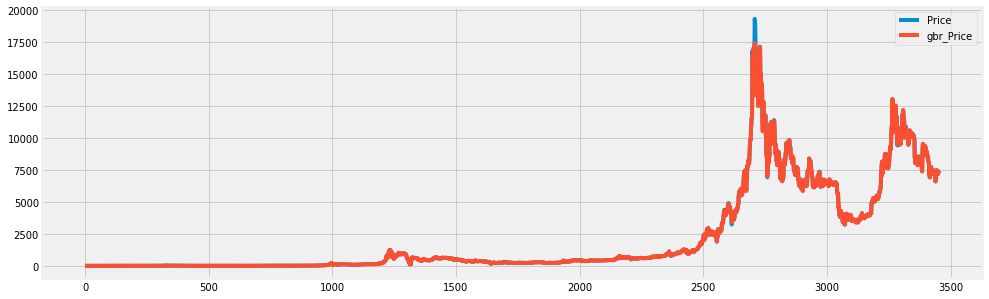

In [ ]:
df['gbr_Price'] = gbr.predict(X_train)

df[['Price','gbr_Price']].plot(figsize=(15, 5))

In [ ]:
dfT['Forecast_gbr'] = gbr.predict(X_test)


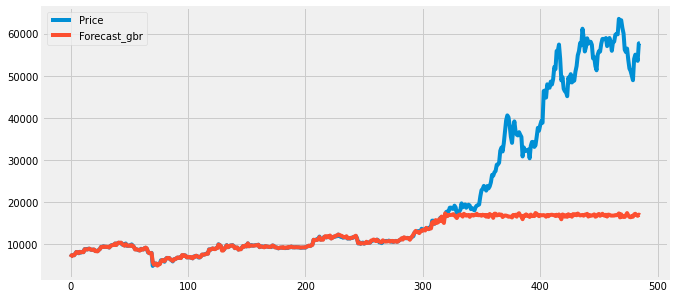

In [ ]:
dfT[['Price','Forecast_gbr']].plot(figsize=(10, 5))

In [ ]:
test_mae = mean_absolute_error(dfT['Price'], dfT['Forecast_gbr'])
test_rmse = np.sqrt(mean_squared_error(dfT['Price'], dfT['Forecast_gbr']))
test_r2 = r2_score(dfT['Price'], dfT['Forecast_gbr'])

print(f"test MAE : {test_mae}")
print(f"test RMSE : {test_rmse}")
print(f"test R2 : {test_r2}")

test MAE : 8257.483634128172
test RMSE : 16518.67765050611
test R2 : 0.0794526241689617


In [ ]:
temp = pd.DataFrame({'test':dfT.Price,'pred':dfT.Forecast_gbr})
temp.head()

,test,pred
0,6967.0,6922.051572
1,7343.1,7386.460839
2,7376.8,7348.258878
3,7372.5,7373.405016
4,7759.1,7709.055566


In [ ]:
temp['upper_range'] = temp['test'] * 1.05
temp['lower_range'] = temp['test'] * 0.95

temp[(temp['upper_range'] >=temp['pred']) & (temp['pred'] >= temp['lower_range'])].shape[0] * 100/temp.shape[0]

65.84362139917695

## ***`Random Forest Regressor`***

In [ ]:
X_train, y_train = df[exogenous_features], df.Price
X_test, y_test = dfT[exogenous_features], dfT.Price

In [ ]:
rf = RandomForestRegressor(n_estimators=1200,
                          max_depth=15,
                          min_samples_split=5,
                          min_samples_leaf=5,
                          max_features=None,
                          oob_score=True,
                          random_state=42)

In [ ]:
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=15, max_features=None, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=5,
                      min_samples_split=5, min_weight_fraction_leaf=0.0,
                      n_estimators=1200, n_jobs=None, oob_score=True,
                      random_state=42, verbose=0, warm_start=False)

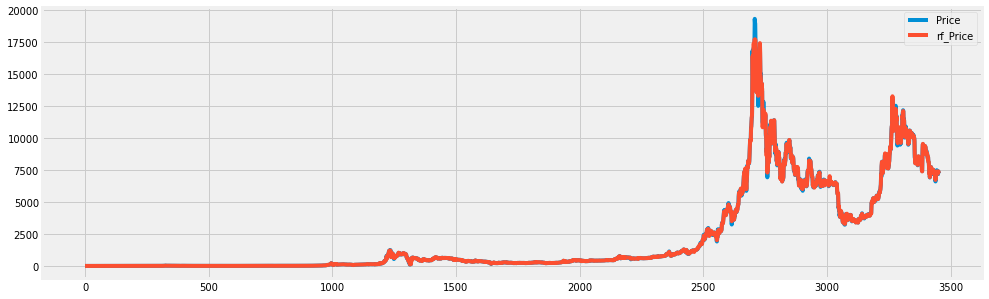

In [ ]:
df['rf_Price'] = rf.predict(X_train)

df[['Price','rf_Price']].plot(figsize=(15, 5))

In [ ]:
dfT['Forecast_rf'] = rf.predict(X_test)


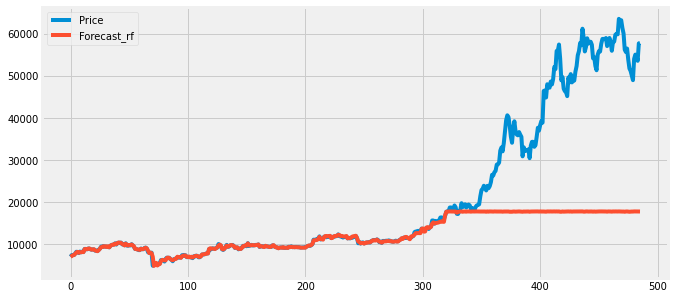

In [ ]:
dfT[['Price','Forecast_rf']].plot(figsize=(10, 5))

In [ ]:
test_mae = mean_absolute_error(dfT['Price'], dfT['Forecast_rf'])
test_rmse = np.sqrt(mean_squared_error(dfT['Price'], dfT['Forecast_rf']))
test_r2 = r2_score(dfT['Price'], dfT['Forecast_rf'])

print(f"test MAE : {test_mae}")
print(f"test RMSE : {test_rmse}")
print(f"test R2 : {test_r2}")

test MAE : 7981.102444786862
test RMSE : 16089.58932901156
test R2 : 0.12665566754054935


In [ ]:
temp = pd.DataFrame({'test':dfT.Price,'pred':dfT.Forecast_rf})
temp.head()

,test,pred
0,6967.0,6956.276005
1,7343.1,7122.785037
2,7376.8,7315.002973
3,7372.5,7391.515316
4,7759.1,7667.578124


In [ ]:
temp['upper_range'] = temp['test'] * 1.05
temp['lower_range'] = temp['test'] * 0.95

temp[(temp['upper_range'] >=temp['pred']) & (temp['pred'] >= temp['lower_range'])].shape[0] * 100/temp.shape[0]

67.48971193415638

## ***`XG Boost`***

In [ ]:
X_train, y_train = df[exogenous_features], df.Price
X_test, y_test = dfT[exogenous_features], dfT.Price

In [ ]:
reg = xgb.XGBRegressor()

In [ ]:
params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30],
 "max_depth"        : [1, 3, 4, 5, 6, 7],
 "n_estimators"     : [int(x) for x in np.linspace(start=100, stop=2000, num=10)],
 "min_child_weight" : [int(x) for x in np.arange(3, 15, 1)],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1],
 "subsample"        : [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1],
 "colsample_bytree" : [0.5, 0.6, 0.7, 0.8, 0.9, 1],
 "colsample_bylevel": [0.5, 0.6, 0.7, 0.8, 0.9, 1],  
 
}

In [ ]:
model  = RandomizedSearchCV(    
                reg,
                param_distributions=params,
                n_iter=10,
                n_jobs=-1,
                cv=5,
                verbose=3,
)

In [ ]:
model.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:   38.3s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.2min finished


[04:45:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          importance_type='gain',
                                          learning_rate=0.1, max_delta_step=0,
                                          max_depth=3, min_child_weight=1,
                                          missing=None, n_estimators=100,
                                          n_jobs=1, nthread=None,
                                          objective='reg:linear',
                                          random_state=0, reg_alpha=...
                                                  0.6, 0.7, 0.8, 0.9, 1],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                  

In [ ]:
print(f"Model Best Score : {model.best_score_}")
print(f"Model Best Parameters : {model.best_estimator_.get_params()}")

Model Best Score : 0.5636023363780035
Model Best Parameters : {'base_score': 0.5, 'booster': 'gbtree', 'colsample_bylevel': 1, 'colsample_bynode': 1, 'colsample_bytree': 0.8, 'gamma': 0.1, 'importance_type': 'gain', 'learning_rate': 0.3, 'max_delta_step': 0, 'max_depth': 6, 'min_child_weight': 3, 'missing': None, 'n_estimators': 1155, 'n_jobs': 1, 'nthread': None, 'objective': 'reg:linear', 'random_state': 0, 'reg_alpha': 0, 'reg_lambda': 1, 'scale_pos_weight': 1, 'seed': None, 'silent': None, 'subsample': 0.8, 'verbosity': 1}


In [ ]:
model.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.8, gamma=0.1,
             importance_type='gain', learning_rate=0.3, max_delta_step=0,
             max_depth=6, min_child_weight=3, missing=None, n_estimators=1155,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=0.8, verbosity=1)

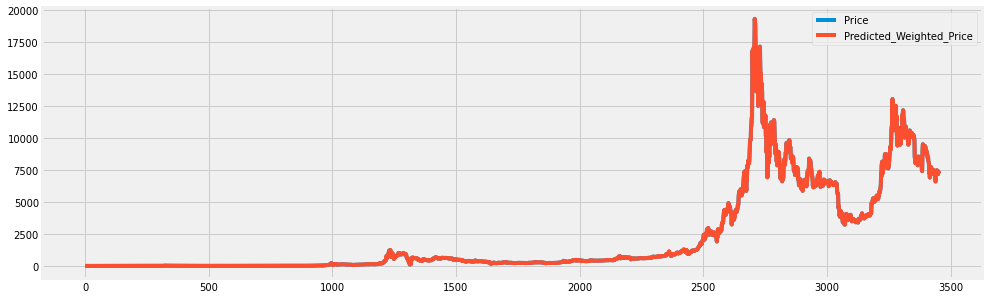

In [ ]:
df['Predicted_Weighted_Price'] = model.predict(X_train)

df[['Price','Predicted_Weighted_Price']].plot(figsize=(15, 5))

In [ ]:
dfT['Forecast_XGBoost'] = model.predict(X_test)


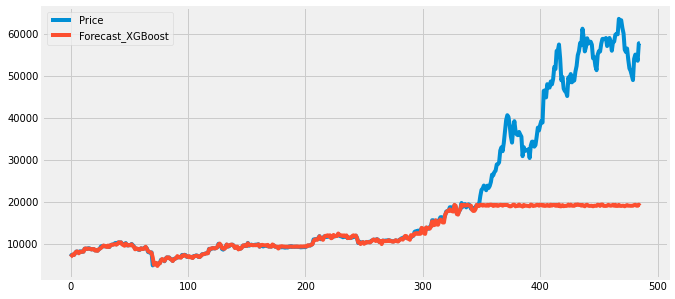

In [ ]:
dfT[['Price','Forecast_XGBoost']].plot(figsize=(10, 5))

In [ ]:
train_mae = mean_absolute_error(df['Price'], df['Predicted_Weighted_Price'])
train_rmse = np.sqrt(mean_squared_error(df['Price'], df['Predicted_Weighted_Price']))
train_r2 = r2_score(df['Price'], df['Predicted_Weighted_Price'])

print(f"train MAE : {train_mae}")
print(f"train RMSE : {train_rmse}")
print(f"train R2 : {train_r2}")

train MAE : 0.10521874707444968
train RMSE : 0.13772068423685285
train R2 : 0.9999999984043696


In [ ]:
test_mae = mean_absolute_error(dfT['Price'], dfT['Forecast_XGBoost'])
test_rmse = np.sqrt(mean_squared_error(dfT['Price'], dfT['Forecast_XGBoost']))
test_r2 = r2_score(dfT['Price'], dfT['Forecast_XGBoost'])

print(f"test MAE : {test_mae}")
print(f"test RMSE : {test_rmse}")
print(f"test R2 : {test_r2}")

test MAE : 7570.41918020994
test RMSE : 15411.236181561702
test R2 : 0.1987453922554392


In [ ]:
temp = pd.DataFrame({'test':dfT.Price,'pred':dfT.Forecast_XGBoost})
temp.head()

,test,pred
0,6967.0,6850.336426
1,7343.1,7140.011230
2,7376.8,7432.558105
3,7372.5,7326.911133
4,7759.1,7835.896484


In [ ]:
temp['upper_range'] = temp['test'] * 1.05
temp['lower_range'] = temp['test'] * 0.95

temp[(temp['upper_range'] >=temp['pred']) & (temp['pred'] >= temp['lower_range'])].shape[0] * 100/temp.shape[0]

69.34156378600824

## ***`FaceBook Prophet`***

In [ ]:
model_fbp = Prophet()
for feature in exogenous_features:
    model_fbp.add_regressor(feature)

model_fbp.fit(df[["newDate", "Price"] + exogenous_features].rename(columns={"newDate": "ds", "Price": "y"}))

forecast = model_fbp.predict(dfT[["newDate", "Price"] + exogenous_features].rename(columns={"newDate": "ds"}))
forecast.head()

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Change,Change_lower,Change_upper,High,High_lower,High_upper,Low,Low_lower,Low_upper,Open,Open_lower,Open_upper,Vol,Vol_lower,Vol_upper,additive_terms,additive_terms_lower,additive_terms_upper,extra_regressors_additive,extra_regressors_additive_lower,extra_regressors_additive_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-02,2141.904317,6887.454904,7083.024514,2141.904317,2141.904317,-3.684084,-3.684084,-3.684084,4186.115928,4186.115928,4186.115928,2861.358894,2861.358894,2861.358894,-2201.104769,-2201.104769,-2201.104769,1.446356,1.446356,1.446356,4842.666798,4842.666798,4842.666798,4844.132325,4844.132325,4844.132325,-3.909142,-3.909142,-3.909142,2.443615,2.443615,2.443615,0.0,0.0,0.0,6984.571115
1,2020-01-03,2141.885640,7161.192794,7357.837129,2141.885640,2141.885640,4.820563,4.820563,4.820563,4348.584920,4348.584920,4348.584920,2851.070415,2851.070415,2851.070415,-2099.438000,-2099.438000,-2099.438000,2.579402,2.579402,2.579402,5117.835278,5117.835278,5117.835278,5107.617300,5107.617300,5107.617300,7.608137,7.608137,7.608137,2.609841,2.609841,2.609841,0.0,0.0,0.0,7259.720918
2,2020-01-04,2141.866964,7249.936436,7448.390369,2141.866964,2141.866964,-0.047682,-0.047682,-0.047682,4373.968074,4373.968074,4373.968074,3093.295706,3093.295706,3093.295706,-2264.657427,-2264.657427,-2264.657427,1.039929,1.039929,1.039929,5205.656369,5205.656369,5205.656369,5203.598600,5203.598600,5203.598600,-0.723067,-0.723067,-0.723067,2.780837,2.780837,2.780837,0.0,0.0,0.0,7347.523333
3,2020-01-05,2141.848287,7318.084902,7518.584427,2141.848287,2141.848287,-0.560129,-0.560129,-0.560129,4431.038144,4431.038144,4431.038144,3125.528976,3125.528976,3125.528976,-2278.513130,-2278.513130,-2278.513130,1.429034,1.429034,1.429034,5283.705578,5283.705578,5283.705578,5278.922895,5278.922895,5278.922895,1.832153,1.832153,1.832153,2.950531,2.950531,2.950531,0.0,0.0,0.0,7425.553865
4,2020-01-06,2141.829610,7586.625670,7784.280618,2141.829610,2141.829610,4.662887,4.662887,4.662887,4668.143693,4668.143693,4668.143693,3138.077352,3138.077352,3138.077352,-2276.677359,-2276.677359,-2276.677359,2.021148,2.021148,2.021148,5540.237444,5540.237444,5540.237444,5536.227722,5536.227722,5536.227722,0.896683,0.896683,0.896683,3.113039,3.113039,3.113039,0.0,0.0,0.0,7682.067054


In [ ]:
dfT["Forecast_Prophet"] = forecast.yhat.values

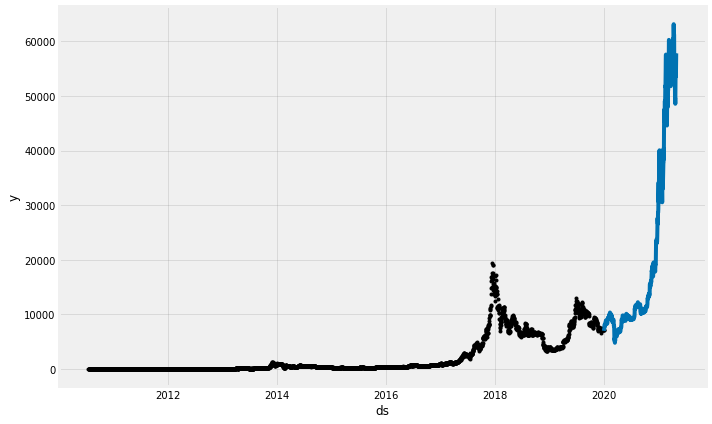

In [ ]:
# Plot Our Predictions
fig1 = model_fbp.plot(forecast)

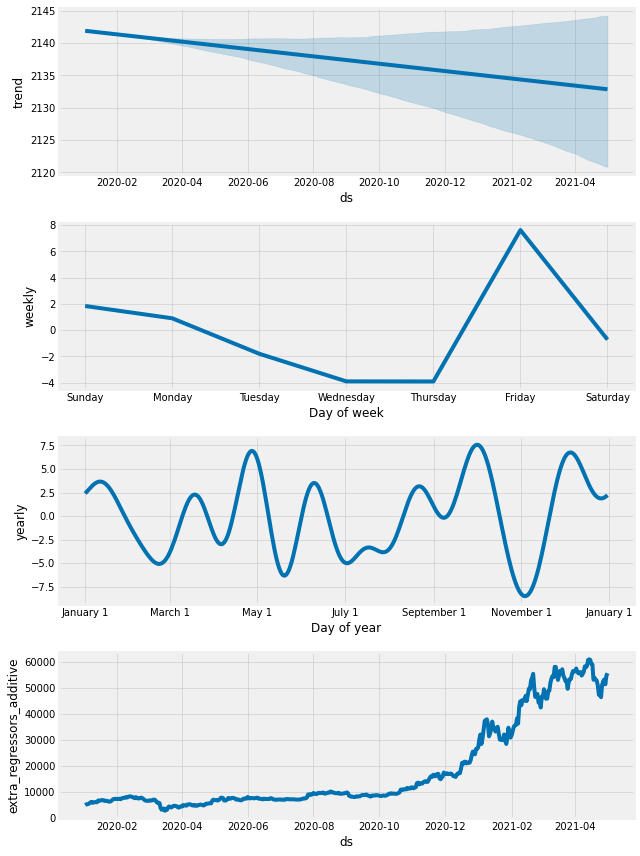

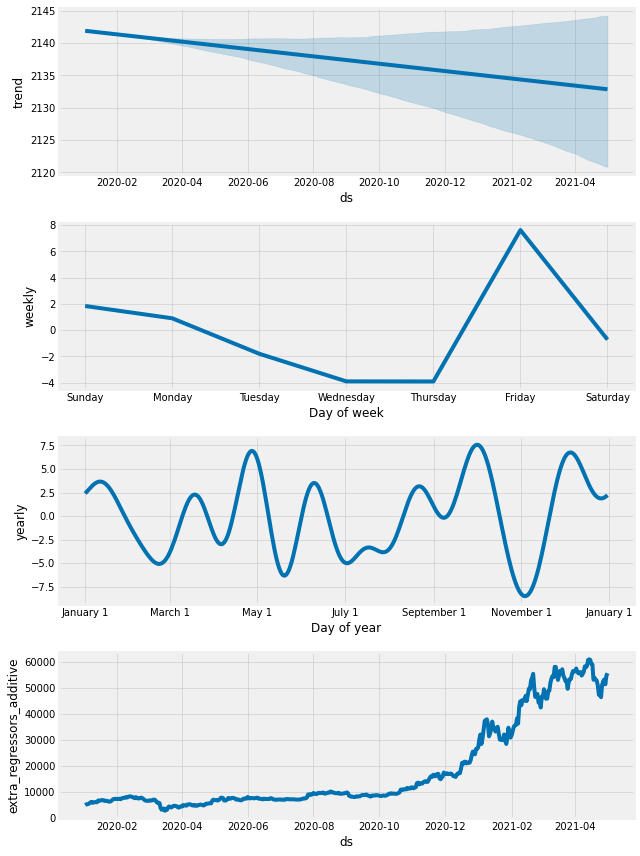

In [ ]:
model_fbp.plot_components(forecast)

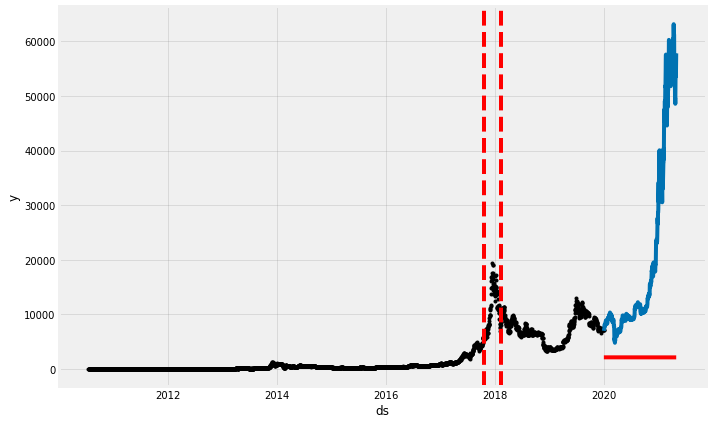

In [ ]:
# Plotting changepoints
from fbprophet.plot import add_changepoints_to_plot
fig = model_fbp.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), model_fbp, forecast)

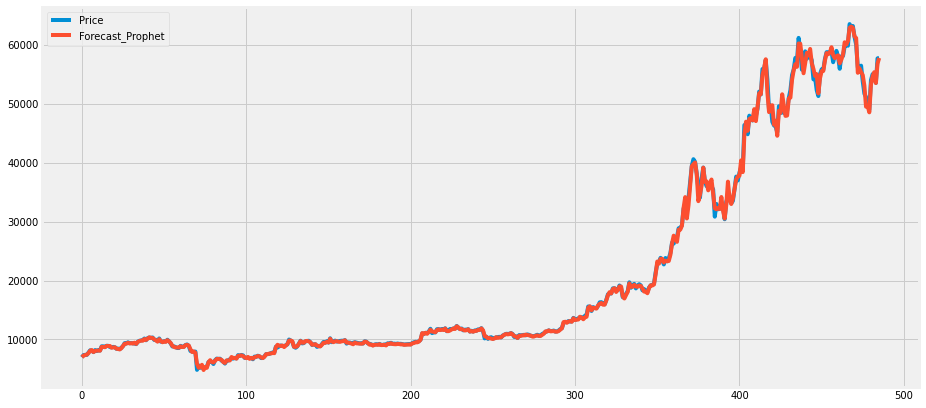

In [ ]:
dfT[["Price", "Forecast_Prophet"]].plot(figsize=(14, 7))

In [ ]:
test_mae = mean_absolute_error(dfT['Price'], dfT['Forecast_Prophet'])
test_rmse = np.sqrt(mean_squared_error(dfT['Price'], dfT['Forecast_Prophet']))

print(f" Prophet's MAE : {test_mae}")
print(f"Prophet's RMSE : {test_rmse}")

 Prophet's MAE : 253.7444872870993
Prophet's RMSE : 486.6399007321618


In [ ]:
temp = pd.DataFrame({'test':dfT.Price,'pred':dfT.Forecast_Prophet})
temp.head()

,test,pred
0,6967.0,6984.571115
1,7343.1,7259.720918
2,7376.8,7347.523333
3,7372.5,7425.553865
4,7759.1,7682.067054


In [ ]:
temp['upper_range'] = temp['test'] * 1.05
temp['lower_range'] = temp['test'] * 0.95

temp[(temp['upper_range'] >=temp['pred']) & (temp['pred'] >= temp['lower_range'])].shape[0] * 100/temp.shape[0]

97.94238683127573

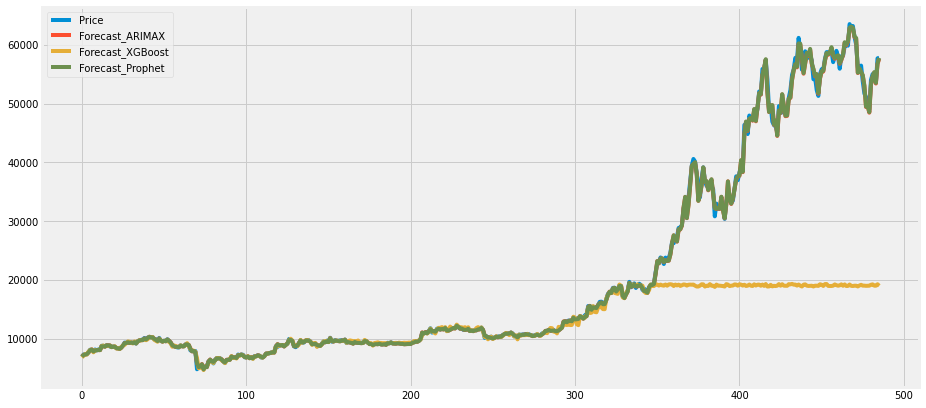

In [ ]:
dfT[["Price", "Forecast_ARIMAX", "Forecast_XGBoost","Forecast_Prophet"]].plot(figsize=(14,7))

## ***`LSTM`***

In [ ]:
price_series = df.reset_index().Price.values
price_seriesT = dfT.reset_index().Price.values

price_series

array([1.0000e-01, 1.0000e-01, 1.0000e-01, ..., 7.2618e+03, 7.1964e+03,
       7.1998e+03])

In [ ]:
price_seriesT.shape

(486,)

In [ ]:
scaler = MinMaxScaler(feature_range = (0, 1))
price_series_scaled = scaler.fit_transform(price_series.reshape(-1,1))
price_series_scaledT = scaler.fit_transform(price_seriesT.reshape(-1,1))

In [ ]:
price_series_scaledT.shape

(486, 1)

In [ ]:
train_data, test_data = price_series_scaled, price_series_scaledT

In [ ]:
train_data.shape, test_data.shape

((3455, 1), (486, 1))

In [ ]:
def windowed_dataset(series, time_step):
    dataX, dataY = [], []
    for i in range(len(series)- time_step-1):
        a = series[i : (i+time_step), 0]
        dataX.append(a)
        dataY.append(series[i+ time_step, 0])
        
    return np.array(dataX), np.array(dataY)


In [ ]:
X_train, y_train = windowed_dataset(train_data, time_step=100)
X_test, y_test = windowed_dataset(test_data, time_step=100)

In [ ]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((3354, 100), (3354,), (385, 100), (385,))

In [ ]:
#reshape inputs to be [samples, timesteps, features] which is requred for LSTM

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)


print(X_train.shape) 
print(X_test.shape)

(3354, 100, 1)
(385, 100, 1)


In [ ]:
print(y_train.shape) 
print(y_test.shape)

(3354,)
(385,)


In [ ]:
# Initialising the LSTM
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [ ]:
regressor.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
dropout (Dropout)            (None, 100, 50)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100, 50)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100, 50)           0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 50)                2

In [ ]:
# Fitting the RNN to the Training set
history = regressor.fit(X_train, y_train, validation_split=0.1, epochs = 50, batch_size = 32, verbose=1, shuffle=False)

Epoch 1/50
95/95 [==============================] - 28s 216ms/step - loss: 0.0043 - val_loss: 0.0396
Epoch 2/50
95/95 [==============================] - 19s 198ms/step - loss: 0.0187 - val_loss: 0.0310
Epoch 3/50
95/95 [==============================] - 19s 195ms/step - loss: 0.0177 - val_loss: 0.0144
Epoch 4/50
95/95 [==============================] - 19s 196ms/step - loss: 0.0221 - val_loss: 0.0138
Epoch 5/50
95/95 [==============================] - 19s 197ms/step - loss: 0.0164 - val_loss: 0.0084
Epoch 6/50
95/95 [==============================] - 19s 197ms/step - loss: 0.0082 - val_loss: 0.0156
Epoch 7/50
95/95 [==============================] - 19s 199ms/step - loss: 0.0090 - val_loss: 0.0134
Epoch 8/50
95/95 [==============================] - 19s 201ms/step - loss: 0.0030 - val_loss: 0.0109
Epoch 9/50
95/95 [==============================] - 19s 198ms/step - loss: 0.0060 - val_loss: 0.0019
Epoch 10/50
95/95 [==============================] - 19s 198ms/step - loss: 0.0033 - val_lo

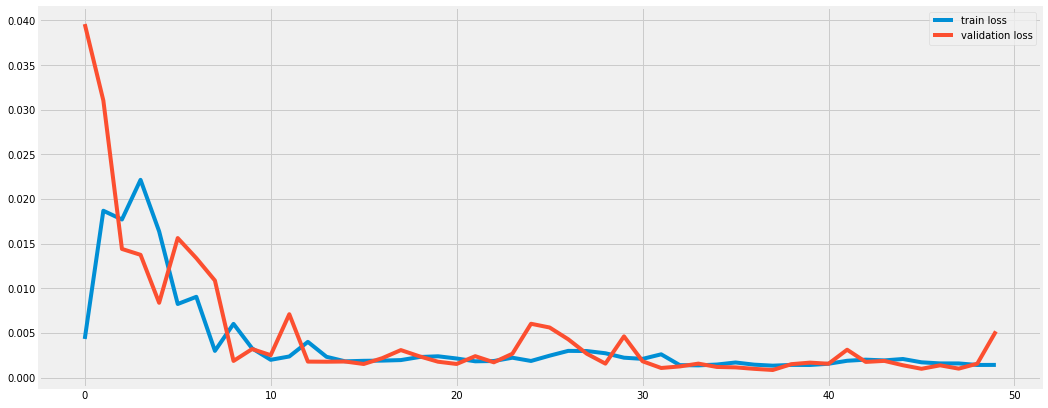

In [ ]:
plt.figure(figsize=(16,7))
plt.plot(history.history["loss"], label= "train loss")
plt.plot(history.history["val_loss"], label= "validation loss")
plt.legend()

In [ ]:
#Lets do the prediction and performance checking

train_predict = regressor.predict(X_train)
test_predict = regressor.predict(X_test)

In [ ]:
#transformation to original form

y_train_inv = scaler.inverse_transform(y_train.reshape(-1, 1))
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))
train_predict_inv = scaler.inverse_transform(train_predict)
test_predict_inv = scaler.inverse_transform(test_predict)

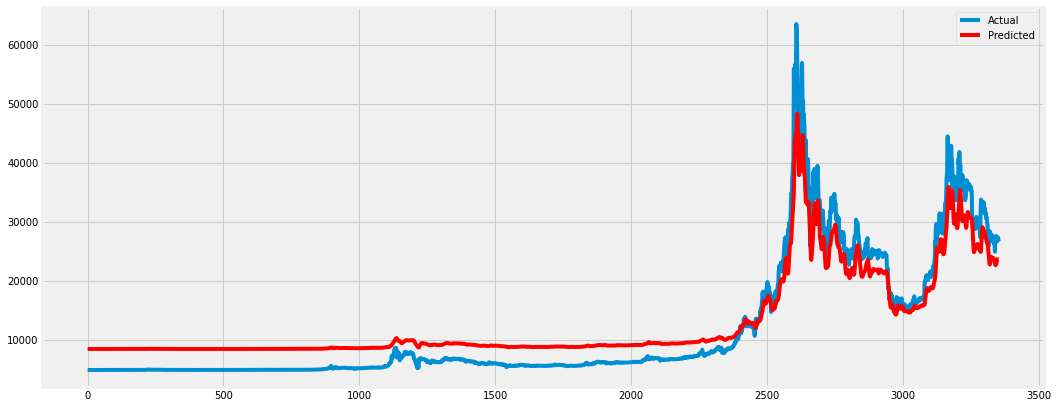

In [ ]:
plt.figure(figsize=(16,7))
plt.plot(y_train_inv.flatten(), label="Actual")
plt.plot(train_predict_inv.flatten(), 'r', label="Predicted")
plt.legend()

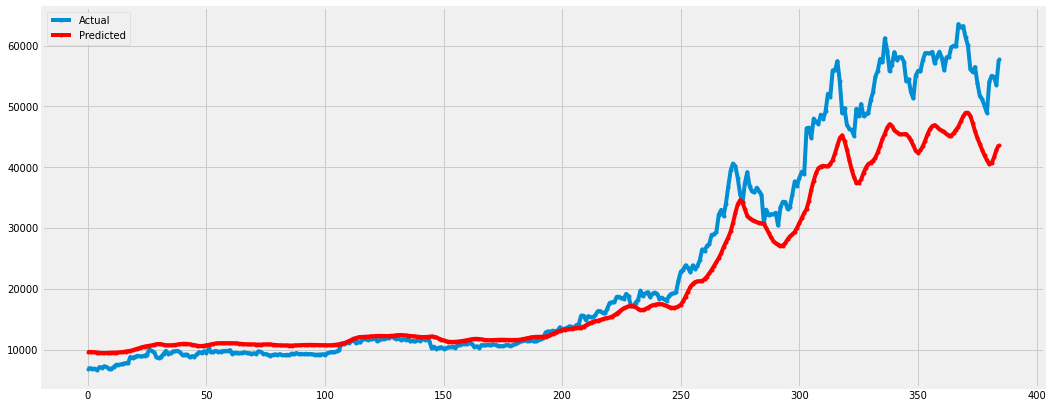

In [ ]:
plt.figure(figsize=(16,7))
plt.plot(y_test_inv.flatten(), marker='.', label="Actual")
plt.plot(test_predict_inv.flatten(), 'r', marker='.', label="Predicted")
plt.legend()

In [ ]:
train_RMSE = np.sqrt(mean_squared_error(y_train, train_predict))
test_RMSE = np.sqrt(mean_squared_error(y_test, test_predict))
train_MAE = np.sqrt(mean_absolute_error(y_train, train_predict))
test_MAE = np.sqrt(mean_absolute_error(y_test, test_predict))


print(f"Train RMSE: {train_RMSE}")
print(f"Train MAE: {train_MAE}")

print(f"Test RMSE: {test_RMSE}")
print(f"Test MAE: {test_MAE}")

Train RMSE: 0.05933227138529731
Train MAE: 0.23215270815296285
Test RMSE: 0.09822954645186623
Test MAE: 0.25635289238335535


In [ ]:
dataframPredict = pd.DataFrame(data=test_predict_inv, columns=["column1"])
datafram = pd.DataFrame(data=y_test_inv, columns=["column1"])

In [ ]:
temp = pd.DataFrame({'test':datafram.column1,'pred':dataframPredict.column1})
temp.head()

,test,pred
0,6867.8,9599.289062
1,6917.6,9601.690430
2,6841.3,9580.840820
3,6850.9,9546.488281
4,6629.1,9508.123047


In [ ]:
temp['upper_range'] = temp['test'] * 1.05
temp['lower_range'] = temp['test'] * 0.95

temp[(temp['upper_range'] >=temp['pred']) & (temp['pred'] >= temp['lower_range'])].shape[0] * 100/temp.shape[0]

14.805194805194805

## ***`Ridge Regressor`***


In [ ]:
X_train, y_train = df[exogenous_features], df.Price
X_test, y_test = dfT[exogenous_features], dfT.Price

In [ ]:
kf = KFold(n_splits=12, random_state=42, shuffle=True)

In [ ]:
ridge_alphas = [1e-15, 1e-10, 1e-8, 9e-4, 7e-4, 5e-4, 3e-4, 1e-4, 1e-3, 5e-2, 1e-2, 0.1, 0.3, 1, 3, 5, 10, 15, 18, 20, 30, 50, 75, 100]

In [ ]:
ridge = make_pipeline(RobustScaler(), RidgeCV(alphas=ridge_alphas, cv=kf))

In [ ]:
ridge.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('robustscaler',
                 RobustScaler(copy=True, quantile_range=(25.0, 75.0),
                              with_centering=True, with_scaling=True)),
                ('ridgecv',
                 RidgeCV(alphas=array([1.0e-15, 1.0e-10, 1.0e-08, 9.0e-04, 7.0e-04, 5.0e-04, 3.0e-04,
       1.0e-04, 1.0e-03, 5.0e-02, 1.0e-02, 1.0e-01, 3.0e-01, 1.0e+00,
       3.0e+00, 5.0e+00, 1.0e+01, 1.5e+01, 1.8e+01, 2.0e+01, 3.0e+01,
       5.0e+01, 7.5e+01, 1.0e+02]),
                         cv=KFold(n_splits=12, random_state=42, shuffle=True),
                         fit_intercept=True, gcv_mode=None, normalize=False,
                         scoring=None, store_cv_values=False))],
         verbose=False)

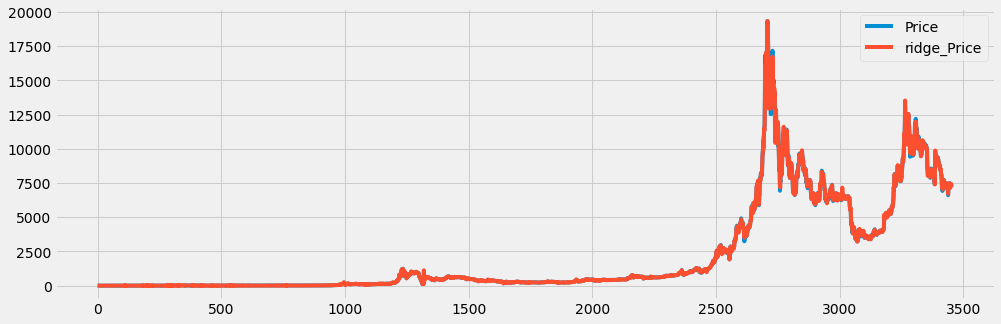

In [ ]:
df['ridge_Price'] = ridge.predict(X_train)

df[['Price','ridge_Price']].plot(figsize=(15, 5))

In [ ]:
dfT['Forecast_ridge'] = ridge.predict(X_test)


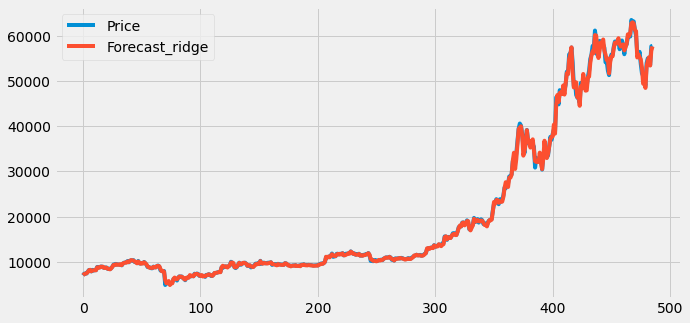

In [ ]:
dfT[['Price','Forecast_ridge']].plot(figsize=(10, 5))

In [ ]:
test_mae = mean_absolute_error(dfT['Price'], dfT['Forecast_ridge'])
test_rmse = np.sqrt(mean_squared_error(dfT['Price'], dfT['Forecast_ridge']))
test_r2 = r2_score(dfT['Price'], dfT['Forecast_ridge'])

print(f"test MAE : {test_mae}")
print(f"test RMSE : {test_rmse}")
print(f"test R2 : {test_r2}")

test MAE : 254.6629090613454
test RMSE : 487.20125816024023
test R2 : 0.9991992215264411


In [ ]:
temp = pd.DataFrame({'test':dfT.Price,'pred':dfT.Forecast_ridge})
temp.head()

,test,pred
0,6967.0,6997.265639
1,7343.1,7263.045698
2,7376.8,7354.593690
3,7372.5,7429.818431
4,7759.1,7689.631924


In [ ]:
temp['upper_range'] = temp['test'] * 1.05
temp['lower_range'] = temp['test'] * 0.95

temp[(temp['upper_range'] >=temp['pred']) & (temp['pred'] >= temp['lower_range'])].shape[0] * 100/temp.shape[0]

97.94238683127573

# ***`1-18`***

## ***`voting`***

In [ ]:
features = ['Open','High','Low','Vol','Change']
x_train = df[features]
y_train = df['Price']

In [ ]:
x_test = dfT[features]
y_test = dfT['Price']

In [ ]:
lightgbm = LGBMRegressor(objective='regression', 
                       num_leaves=6,
                       learning_rate=0.01, 
                       n_estimators=7000,
                       max_bin=200, 
                       bagging_fraction=0.8,
                       bagging_freq=4, 
                       bagging_seed=8,
                       feature_fraction=0.2,
                       feature_fraction_seed=8,
                       min_sum_hessian_in_leaf = 11,
                       verbose=-1,
                       random_state=42)
gbr = GradientBoostingRegressor(n_estimators=6000,
                                learning_rate=0.01,
                                max_depth=4,
                                max_features='sqrt',
                                min_samples_leaf=15,
                                min_samples_split=10,
                                loss='huber',
                                random_state=42)  


rf = RandomForestRegressor(n_estimators=1200,
                          max_depth=15,
                          min_samples_split=5,
                          min_samples_leaf=5,
                          max_features=None,
                          oob_score=True,
                          random_state=42)
xgboost = XGBRegressor(learning_rate=0.01,
                       n_estimators=6000,
                       max_depth=4,
                       min_child_weight=0,
                       gamma=0.6,
                       subsample=0.7,
                       colsample_bytree=0.7,
                       objective='reg:linear',
                       nthread=-1,
                       scale_pos_weight=1,
                       seed=27,
                       reg_alpha=0.00006,
                       random_state=42)

In [ ]:
votingreg = VotingRegressor([('gbr',gbr),('rf',rf), ('xgboost', xgboost)])

In [ ]:
test_pred = votingreg.fit(x_train, y_train).predict(x_test)

[05:47:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, test_pred))
print('MSE:', metrics.mean_squared_error(y_test, test_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, test_pred)))
print('r2_score:',r2_score(y_test, test_pred))

MAE: 8048.743442341143
MSE: 262677822.12227932
RMSE: 16207.338526799498
r2_score: 0.11382601903783651


In [ ]:
temp = pd.DataFrame({'test':dfT.Price,'pred':test_pred})
temp.head()

,test,pred
0,6967.0,6956.340313
1,7343.1,7269.610865
2,7376.8,7371.636977
3,7372.5,7409.721585
4,7759.1,7709.274913


In [ ]:
temp['upper_range'] = temp['test'] * 1.05
temp['lower_range'] = temp['test'] * 0.95

temp[(temp['upper_range'] >=temp['pred']) & (temp['pred'] >= temp['lower_range'])].shape[0] * 100/temp.shape[0]

67.07818930041152

## ***`bagging`***

In [ ]:
features = ['Open','High','Low','Vol','Change']
x_train = df[features]
y_train = df['Price']

In [ ]:
x_test = dfT[features]
y_test = dfT['Price']

In [ ]:
regr = BaggingRegressor(base_estimator=XGBRegressor(), n_estimators=10, random_state=0).fit(x_train, y_train)

In [ ]:
test_pred = regr.predict(x_test)

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, test_pred))
print('MSE:', metrics.mean_squared_error(y_test, test_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, test_pred)))
print('r2_score:',r2_score(y_test, test_pred))

MAE: 7608.423234752765
MSE: 240737200.88964447
RMSE: 15515.70819813406
r2_score: 0.18784523963825683


In [ ]:
temp = pd.DataFrame({'test':dfT.Price,'pred':test_pred})

In [ ]:
temp['upper_range'] = temp['test'] * 1.05
temp['lower_range'] = temp['test'] * 0.95

temp[(temp['upper_range'] >=temp['pred']) & (temp['pred'] >= temp['lower_range'])].shape[0] * 100/temp.shape[0]

70.16460905349794

In [ ]:
regr = BaggingRegressor(base_estimator=RandomForestRegressor(), n_estimators=10, random_state=0).fit(x_train, y_train)

In [ ]:
test_pred = regr.predict(x_test)

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, test_pred))
print('MSE:', metrics.mean_squared_error(y_test, test_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, test_pred)))
print('r2_score:',r2_score(y_test, test_pred))

MAE: 7693.062752057614
MSE: 245294132.12009287
RMSE: 15661.868730138587
r2_score: 0.17247190565508796


In [ ]:
temp = pd.DataFrame({'test':dfT.Price,'pred':test_pred})

In [ ]:
temp['upper_range'] = temp['test'] * 1.05
temp['lower_range'] = temp['test'] * 0.95

temp[(temp['upper_range'] >=temp['pred']) & (temp['pred'] >= temp['lower_range'])].shape[0] * 100/temp.shape[0]

70.78189300411523

In [ ]:
regr = BaggingRegressor(base_estimator=GradientBoostingRegressor(), n_estimators=10, random_state=0).fit(x_train, y_train)

In [ ]:
test_pred = regr.predict(x_test)

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, test_pred))
print('MSE:', metrics.mean_squared_error(y_test, test_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, test_pred)))
print('r2_score:',r2_score(y_test, test_pred))

MAE: 7586.439196338683
MSE: 240380671.2748307
RMSE: 15504.214629410633
r2_score: 0.1890480334848701


In [ ]:
temp = pd.DataFrame({'test':dfT.Price,'pred':test_pred})

In [ ]:
temp['upper_range'] = temp['test'] * 1.05
temp['lower_range'] = temp['test'] * 0.95

temp[(temp['upper_range'] >=temp['pred']) & (temp['pred'] >= temp['lower_range'])].shape[0] * 100/temp.shape[0]

71.39917695473251

## ***`boosting`***

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
est = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1,max_depth=10, random_state=0, loss='ls').fit(x_train, y_train)

In [ ]:
test_pred = est.predict(x_test)

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, test_pred))
print('MSE:', metrics.mean_squared_error(y_test, test_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, test_pred)))
print('r2_score:',r2_score(y_test, test_pred))

MAE: 7569.879954363816
MSE: 237604492.93382037
RMSE: 15414.42483305233
r2_score: 0.1984137918592821


In [ ]:
temp = pd.DataFrame({'test':dfT.Price,'pred':test_pred})

In [ ]:
temp['upper_range'] = temp['test'] * 1.05
temp['lower_range'] = temp['test'] * 0.95

temp[(temp['upper_range'] >=temp['pred']) & (temp['pred'] >= temp['lower_range'])].shape[0] * 100/temp.shape[0]

68.3127572016461

# ***`1-19`***

In [ ]:
features = ['Open','High','Low','Vol','Change']
x_train = df[features]
y_train = df['Price']

In [ ]:
x_test = dfT[features]
y_test = dfT['Price']

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
ada=AdaBoostRegressor(n_estimators=50, learning_rate=0.2,loss='exponential').fit(x_train, y_train)
pred=ada.predict(x_test)
adab=ada.score(x_test,y_test)
predict = ada.predict(x_test)

In [ ]:
dfT["Forecast_Adaboost"] = predict

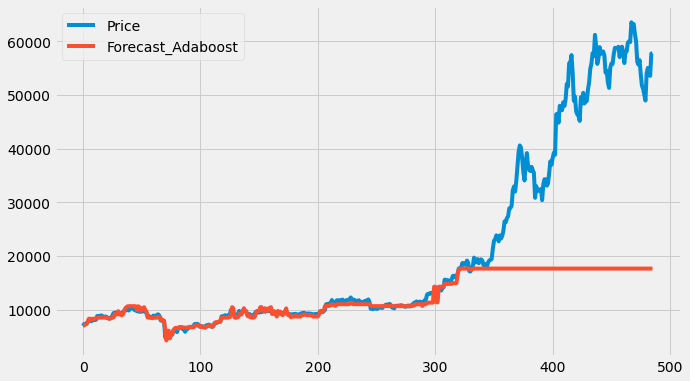

In [ ]:
dfT[["Price", "Forecast_Adaboost"]].plot(figsize=(10, 6))

In [ ]:
test_mae = mean_absolute_error(dfT['Price'], dfT['Forecast_Adaboost'])
test_rmse = np.sqrt(mean_squared_error(dfT['Price'], dfT['Forecast_Adaboost']))
test_r2 = r2_score(dfT['Price'], dfT['Forecast_Adaboost'])

print(f"test MAE : {test_mae}")
print(f"test RMSE : {test_rmse}")
print(f"test R2 : {test_r2}")

test MAE : 8183.429362780755
test RMSE : 16122.868929872582
test R2 : 0.12303909179501626


In [ ]:
temp = pd.DataFrame({'test':dfT.Price,'pred':dfT.Forecast_Adaboost})
temp.head()

,test,pred
0,6967.0,7064.143539
1,7343.1,7064.143539
2,7376.8,7305.025653
3,7372.5,7342.554319
4,7759.1,7700.283935


In [ ]:
temp['upper_range'] = temp['test'] * 1.05
temp['lower_range'] = temp['test'] * 0.95

temp[(temp['upper_range'] >=temp['pred']) & (temp['pred'] >= temp['lower_range'])].shape[0] * 100/temp.shape[0]

51.440329218106996

In [ ]:
ada=AdaBoostRegressor(n_estimators=100, learning_rate=0.2,loss='square').fit(x_train, y_train)
pred=ada.predict(x_test)
adab=ada.score(x_test,y_test)
predict = ada.predict(x_test)

In [ ]:
dfT["Forecast_Adaboost"] = predict

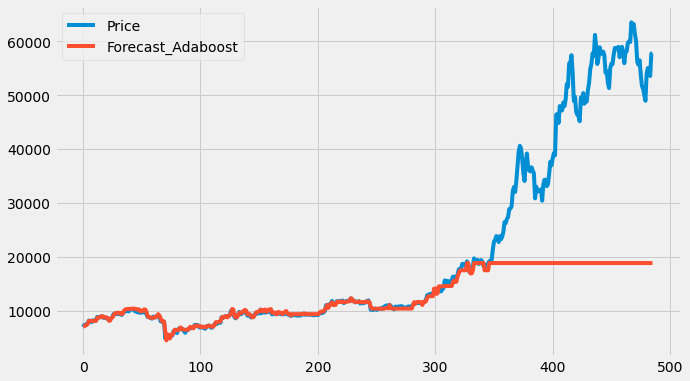

In [ ]:
dfT[["Price", "Forecast_Adaboost"]].plot(figsize=(10, 6))

In [ ]:
test_mae = mean_absolute_error(dfT['Price'], dfT['Forecast_Adaboost'])
test_rmse = np.sqrt(mean_squared_error(dfT['Price'], dfT['Forecast_Adaboost']))
test_r2 = r2_score(dfT['Price'], dfT['Forecast_Adaboost'])

print(f"test MAE : {test_mae}")
print(f"test RMSE : {test_rmse}")
print(f"test R2 : {test_r2}")

test MAE : 7721.196891317671
test RMSE : 15543.877154959839
test R2 : 0.18489360902942065


In [ ]:
temp = pd.DataFrame({'test':dfT.Price,'pred':dfT.Forecast_Adaboost})

In [ ]:
temp['upper_range'] = temp['test'] * 1.05
temp['lower_range'] = temp['test'] * 0.95

temp[(temp['upper_range'] >=temp['pred']) & (temp['pred'] >= temp['lower_range'])].shape[0] * 100/temp.shape[0]

66.04938271604938

# ***`1-20`***

In [ ]:
features = ['Open','High','Low','Vol','Change']
x_train = df[features]
y_train = df['Price']

In [ ]:
x_test = dfT[features]
y_test = dfT['Price']

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(random_state=1)

In [ ]:
rf_model.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=1, verbose=0, warm_start=False)

In [ ]:
rf_pred = rf_model.predict(x_test)

In [ ]:
dfT["Forecast_RandomForest"] = rf_pred

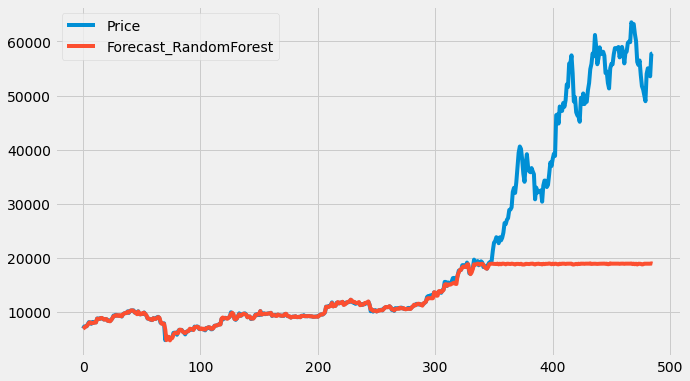

In [ ]:
dfT[["Price", "Forecast_RandomForest"]].plot(figsize=(10, 6))

In [ ]:
test_mae = mean_absolute_error(dfT['Price'], dfT['Forecast_RandomForest'])
test_rmse = np.sqrt(mean_squared_error(dfT['Price'], dfT['Forecast_RandomForest']))
test_r2 = r2_score(dfT['Price'], dfT['Forecast_RandomForest'])

print(f"test MAE : {test_mae}")
print(f"test RMSE : {test_rmse}")
print(f"test R2 : {test_r2}")

test MAE : 7594.654465020577
test RMSE : 15499.614641062464
test R2 : 0.1895291692662311


In [ ]:
temp = pd.DataFrame({'test':dfT.Price,'pred':dfT.Forecast_RandomForest})
temp.head()

,test,pred
0,6967.0,6945.230
1,7343.1,7109.263
2,7376.8,7334.862
3,7372.5,7408.522
4,7759.1,7652.585


In [ ]:
temp['upper_range'] = temp['test'] * 1.05
temp['lower_range'] = temp['test'] * 0.95

temp[(temp['upper_range'] >=temp['pred']) & (temp['pred'] >= temp['lower_range'])].shape[0] * 100/temp.shape[0]

70.57613168724279

In [ ]:
rf_model2 = RandomForestRegressor(random_state=1,max_depth=20,max_features="sqrt")

In [ ]:
rf_model2.fit(x_train, y_train)
rf_pred2 = rf_model2.predict(x_test)
dfT["Forecast_RandomForest2"] = rf_pred2

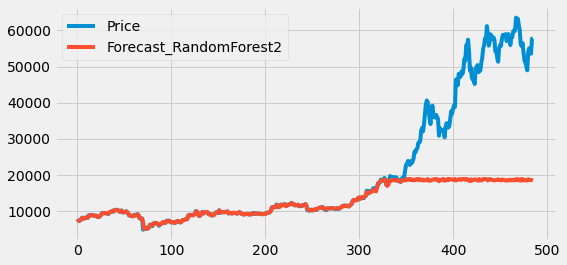

In [ ]:
dfT[["Price", "Forecast_RandomForest2"]].plot(figsize=(8, 4))

In [ ]:
test_mae = mean_absolute_error(dfT['Price'], dfT['Forecast_RandomForest2'])
test_rmse = np.sqrt(mean_squared_error(dfT['Price'], dfT['Forecast_RandomForest2']))
test_r2 = r2_score(dfT['Price'], dfT['Forecast_RandomForest2'])

print(f"test MAE : {test_mae}")
print(f"test RMSE : {test_rmse}")
print(f"test R2 : {test_r2}")

test MAE : 7672.565469135803
test RMSE : 15644.073241696864
test R2 : 0.17435136214615843


In [ ]:
temp = pd.DataFrame({'test':dfT.Price,'pred':dfT.Forecast_RandomForest2})
temp.head()

,test,pred
0,6967.0,6973.408
1,7343.1,7239.802
2,7376.8,7325.465
3,7372.5,7397.197
4,7759.1,7644.488


In [ ]:
temp['upper_range'] = temp['test'] * 1.05
temp['lower_range'] = temp['test'] * 0.95

temp[(temp['upper_range'] >=temp['pred']) & (temp['pred'] >= temp['lower_range'])].shape[0] * 100/temp.shape[0]

70.98765432098766

# ***`1-22`***

In [ ]:
def target_column(x):
    if x > 0:
        return 1
    else:
       return 0  

In [ ]:
df['target'] = df['Change'].apply(target_column)

In [ ]:
dfT['target'] = dfT['Change'].apply(target_column)

In [ ]:
features = ['Open','High','Low','Vol','Change','Price']
x_train = df[features]
y_train = df['target']

In [ ]:
x_test = dfT[features]
y_test = dfT['target']

In [ ]:
EPOCHS = 50
BATCH_SIZE = 64

In [ ]:
#reshape inputs to be [samples, timesteps, features] which is requred for LSTM

x_train = x_train.values.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test = x_test.values.reshape(x_test.shape[0], x_test.shape[1], 1)


print(x_train.shape) 
print(x_test.shape)

(3455, 6, 1)
(486, 6, 1)


In [ ]:
LSTM_model = Sequential()

LSTM_model.add(LSTM(128, input_shape=(x_train.shape[1],1),return_sequences=True))
LSTM_model.add(Dropout(0.2))
LSTM_model.add(BatchNormalization())

LSTM_model.add(LSTM(128,return_sequences=True))
LSTM_model.add(Dropout(0.1))
LSTM_model.add(BatchNormalization())

LSTM_model.add(LSTM(128))
LSTM_model.add(Dropout(0.2))
LSTM_model.add(BatchNormalization())

LSTM_model.add(Dense(32, activation='relu'))
LSTM_model.add(Dropout(0.2))

LSTM_model.add(Dense(2, activation='softmax'))

In [ ]:
LSTM_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_5 (LSTM)                (None, 6, 128)            66560     
_________________________________________________________________
dropout_4 (Dropout)          (None, 6, 128)            0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 6, 128)            512       
_________________________________________________________________
lstm_6 (LSTM)                (None, 6, 128)            131584    
_________________________________________________________________
dropout_5 (Dropout)          (None, 6, 128)            0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 6, 128)            512       
_________________________________________________________________
lstm_7 (LSTM)                (None, 128)              

In [ ]:
opt = tf.keras.optimizers.Adam(learning_rate=0.001, decay=1e-6)

In [ ]:
LSTM_model.compile(loss='sparse_categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [ ]:
history = LSTM_model.fit(x_train, y_train,
                    batch_size=BATCH_SIZE,
                    epochs=EPOCHS,
                    validation_data=(x_test, y_test))

Epoch 1/50
54/54 [==============================] - 9s 72ms/step - loss: 0.2967 - accuracy: 0.8634 - val_loss: 0.7359 - val_accuracy: 0.5556
Epoch 2/50
54/54 [==============================] - 3s 47ms/step - loss: 0.1133 - accuracy: 0.9511 - val_loss: 0.7072 - val_accuracy: 0.5741
Epoch 3/50
54/54 [==============================] - 3s 48ms/step - loss: 0.1009 - accuracy: 0.9603 - val_loss: 0.3572 - val_accuracy: 0.8086
Epoch 4/50
54/54 [==============================] - 3s 48ms/step - loss: 0.0700 - accuracy: 0.9708 - val_loss: 0.1568 - val_accuracy: 0.9897
Epoch 5/50
54/54 [==============================] - 3s 47ms/step - loss: 0.0681 - accuracy: 0.9719 - val_loss: 0.0817 - val_accuracy: 0.9733
Epoch 6/50
54/54 [==============================] - 3s 48ms/step - loss: 0.0649 - accuracy: 0.9742 - val_loss: 0.0440 - val_accuracy: 0.9897
Epoch 7/50
54/54 [==============================] - 3s 49ms/step - loss: 0.0442 - accuracy: 0.9818 - val_loss: 0.0289 - val_accuracy: 0.9959
Epoch 8/50
54

In [ ]:
rnn_score = LSTM_model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', rnn_score[0])
print('Test accuracy:', rnn_score[1])

Test loss: 0.011201261542737484
Test accuracy: 0.9938271641731262


# ***`1-23`***

In [ ]:
features = ['Open','High','Low','Vol','Change','target']
x_train = df[features]
y_train = df['Price']
x_test = dfT[features]
y_test = dfT['Price']

In [ ]:
features = ['Open','High','Low','Vol','Change','target']


In [ ]:
model = pm.auto_arima(df.Price, exogenous=df[features], trace=True, error_action="ignore", suppress_warnings=True)
model.fit(df.Price, exogenous=df[features])
forecast = model.predict(n_periods=len(dfT), exogenous=dfT[features])
dfT["Forecast_ARIMAX"] = forecast

Performing stepwise search to minimize aic


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:1890: RuntimeWarning:

divide by zero encountered in reciprocal

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:1897: RuntimeWarning:

divide by zero encountered in reciprocal



 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=39888.405, Time=5.32 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=39878.860, Time=2.37 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=39854.845, Time=2.57 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=39856.465, Time=3.48 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=64585.262, Time=1.71 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=39854.496, Time=4.35 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=39856.453, Time=4.78 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=39856.278, Time=4.20 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=39852.894, Time=4.14 sec


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:1890: RuntimeWarning:

divide by zero encountered in reciprocal

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:1897: RuntimeWarning:

divide by zero encountered in reciprocal



 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=39886.449, Time=4.43 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=39855.914, Time=4.66 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=39863.776, Time=8.81 sec

Best model:  ARIMA(1,0,1)(0,0,0)[0] intercept
Total fit time: 50.886 seconds


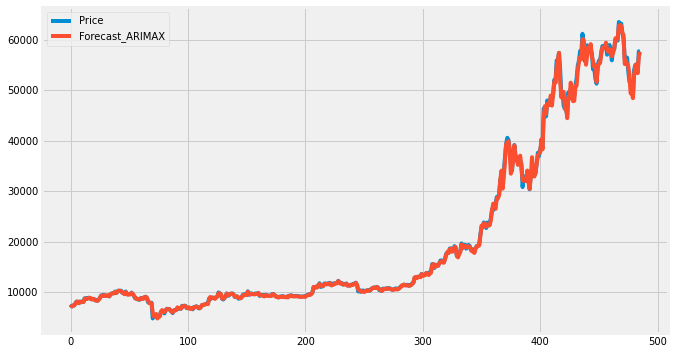

In [ ]:
dfT[["Price", "Forecast_ARIMAX"]].plot(figsize=(10, 6))

In [ ]:
print("RMSE of Auto ARIMAX:", np.sqrt(mean_squared_error(dfT.Price, dfT.Forecast_ARIMAX)))

print("\nMAE of Auto ARIMAX:", mean_absolute_error(dfT.Price, dfT.Forecast_ARIMAX))

RMSE of Auto ARIMAX: 488.5439920809565

MAE of Auto ARIMAX: 258.1158347133519


In [ ]:
temp = pd.DataFrame({'test':dfT.Price,'pred':dfT.Forecast_ARIMAX})
temp.head()

,test,pred
0,6967.0,6989.737691
1,7343.1,7262.344726
2,7376.8,7356.144595
3,7372.5,7418.909113
4,7759.1,7688.263727


In [ ]:
temp['upper_range'] = temp['test'] * 1.05
temp['lower_range'] = temp['test'] * 0.95

temp[(temp['upper_range'] >=temp['pred']) & (temp['pred'] >= temp['lower_range'])].shape[0] * 100/temp.shape[0]

98.35390946502058

# ***`1-26`***

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [5]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/MyDrive/kaggle"

In [7]:
!ls

gdrive	sample_data


In [8]:
import zipfile
zip_ref = zipfile.ZipFile('/content/gdrive/MyDrive/kaggle/Desktop.zip', 'r')
zip_ref.extractall('files')
zip_ref.close()

In [9]:
!ls

files  gdrive  sample_data


In [10]:
training_data = pd.read_csv('/content/files/training_data.csv',nrows=50000).set_index("id")
tournament_data = pd.read_csv('/content/files/tournament_data.csv',nrows=100000).set_index ('id')

feature_names = [ f for f in training_data.columns if "feature" in f ]

In [11]:
model = XGBRegressor ( max_depth =5 , learning_rate= 0.01 , n_estimators=2000, colsample_bytree = 0.1 )
model.fit(training_data[feature_names],training_data["target"])

predictions = model.predict(tournament_data[feature_names])

[12:06:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [12]:
predictions

array([0.46547246, 0.4772104 , 0.55718875, ..., 0.45788038, 0.5258958 ,
       0.482519  ], dtype=float32)

In [ ]:
pd.DataFrame(predictions).to_csv('predictions.csv')

In [ ]:
gbr = GradientBoostingRegressor(n_estimators=6000,learning_rate=0.01,
                                max_depth=4,max_features='sqrt',
                                min_samples_leaf=15,
                                min_samples_split=10,
                                loss='huber',random_state=42)  

In [ ]:
gbr.fit(training_data[feature_names],training_data["target"])
predictGbr = gbr.predict(tournament_data[feature_names])

In [ ]:
predictGbr

array([0.45725866, 0.4468723 , 0.55534376, ..., 0.46394901, 0.51614985,
       0.47250196])

In [ ]:
temp = pd.DataFrame({'test':predictGbr,'pred':tournament_data.target})
temp.head()

,test,pred
id,,
n0003aa52cab36c2,0.457259,0.25
n000920ed083903f,0.446872,0.50
n0038e640522c4a6,0.555344,1.00
n004ac94a87dc54b,0.456968,0.50
n0052fe97ea0c05f,0.509990,0.75


In [ ]:
temp['upper_range'] = temp['test'] * 1.2
temp['lower_range'] = temp['test'] * 0.8

temp[(temp['upper_range'] >=temp['pred']) & (temp['pred'] >= temp['lower_range'])].shape[0] * 100/temp.shape[0]

28.093

In [ ]:
temp = pd.DataFrame({'test':predictions,'pred':tournament_data.target})
temp.head()

,test,pred
id,,
n0003aa52cab36c2,0.465472,0.25
n000920ed083903f,0.477210,0.50
n0038e640522c4a6,0.557189,1.00
n004ac94a87dc54b,0.487628,0.50
n0052fe97ea0c05f,0.500125,0.75


In [ ]:
temp['upper_range'] = temp['test'] * 1.2
temp['lower_range'] = temp['test'] * 0.8

temp[(temp['upper_range'] >=temp['pred']) & (temp['pred'] >= temp['lower_range'])].shape[0] * 100/temp.shape[0]

28.177

In [19]:
lightgbm = LGBMRegressor(objective='regression', 
                       num_leaves=6,
                       learning_rate=0.01, 
                       n_estimators=7000,
                       max_bin=200, 
                       bagging_fraction=0.8,
                       bagging_freq=4, 
                       bagging_seed=8,
                       feature_fraction=0.2,
                       feature_fraction_seed=8,
                       min_sum_hessian_in_leaf = 11,
                       verbose=-1,
                       random_state=42)

In [20]:
lightgbm.fit(training_data[feature_names],training_data["target"])

LGBMRegressor(bagging_fraction=0.8, bagging_freq=4, bagging_seed=8,
              boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              feature_fraction=0.2, feature_fraction_seed=8,
              importance_type='split', learning_rate=0.01, max_bin=200,
              max_depth=-1, min_child_samples=20, min_child_weight=0.001,
              min_split_gain=0.0, min_sum_hessian_in_leaf=11, n_estimators=7000,
              n_jobs=-1, num_leaves=6, objective='regression', random_state=42,
              reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=1.0,
              subsample_for_bin=200000, subsample_freq=0, verbose=-1)

In [21]:
predictLightgbm = lightgbm.predict(tournament_data[feature_names])

In [22]:
predictLightgbm

array([0.47464881, 0.46274834, 0.56126726, ..., 0.471091  , 0.51286592,
       0.47264152])

In [23]:
temp = pd.DataFrame({'test':predictLightgbm,'pred':tournament_data.target})
temp.head()

,test,pred
id,,
n0003aa52cab36c2,0.474649,0.25
n000920ed083903f,0.462748,0.50
n0038e640522c4a6,0.561267,1.00
n004ac94a87dc54b,0.465690,0.50
n0052fe97ea0c05f,0.506278,0.75


In [24]:
temp['upper_range'] = temp['test'] * 1.2
temp['lower_range'] = temp['test'] * 0.8

temp[(temp['upper_range'] >=temp['pred']) & (temp['pred'] >= temp['lower_range'])].shape[0] * 100/temp.shape[0]

28.15